# 盘前作业(Pre-market Work):20241126

In [1]:
repday='20241126'
lastday='20241125'

In [54]:
from rich.console import Console
from rich.table import Table

#美观显示DataFrame表格
class DataFramePretty(object):
    def __init__(self, df: pd.DataFrame, min_max_cols=[]) -> None:
        self.data = df
        self.min_max_cols = min_max_cols

    def __set_min_max_style(self, df: pd.DataFrame):
        imax = self.data.idxmax()
        imin = self.data.idxmin()

        max_tmpl = "[b on red3]{}[/b on red3]"
        min_tmpl = "[i on green3]{}[/i on green3]"

        for col in self.min_max_cols:
            col_idx = imax.index.tolist().index(col)
            val = df.iloc[imax[col], col_idx]
            df.iloc[imax[col], col_idx] = max_tmpl.format(val)

            col_idx = imin.index.tolist().index(col)
            val = df.iloc[imin[col], col_idx]
            df.iloc[imin[col], col_idx] = min_tmpl.format(val)

    def show(self):
        table = Table(
            title="DataFrame",
            title_style="i on dark_cyan",
            header_style="bold cyan",
        )

        # self.data是原始数据
        # df 是用来显示的数据
        df = self.data.copy()
        for col in df.columns:
            df[col] = df[col].astype("str")
            table.add_column(col)

        self.__set_min_max_style(df)

        for idx in range(len(df)):
            table.add_row(*df.iloc[idx].tolist())

        console = Console()
        console.print(table)

## 1. 新闻
###  1.1 新浪财经首页截屏

In [2]:
from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.edge.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.edge.service import Service as EdgeService
from webdriver_manager.microsoft import EdgeChromiumDriverManager
import time
import os

#sina.png保存首页财经新闻截图
def getSinaShot():
    sinafile='sina.png'
    if not os.path.exists(sinafile):
        driver = webdriver.Edge(service=EdgeService(EdgeChromiumDriverManager().install()))
        driver.implicitly_wait(10)
        driver.get("https://finance.sina.com.cn")
        time.sleep(5)
        popup=driver.find_element(By.CLASS_NAME,"SNP-layer")
        if popup:
            driver.find_element(By.CLASS_NAME,"snp-btn-close-new").click()

        #移动到新闻关键页面位置
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight/20);")
        driver.save_screenshot(sinafile)
        driver.close()
    
getSinaShot()

![首页新闻](sina.png)

### 1.2 东方财富国内早盘新闻 

In [3]:
import akshare as ak
import pandas as pd

news_dfgn = ak.stock_info_cjzc_em()
news_dfgn['发布时间']=pd.to_datetime(news_dfgn['发布时间'])
news_dfgn[news_dfgn['发布时间']>lastday]

,标题,摘要,发布时间,链接
0,东方财富财经早餐 11月26日周二,【财经早餐】1、九部门联合召开科技创新和技术改造贷款工作推进会议。2、十二部门印发《5G规模...,2024-11-26 06:00:48,http://finance.eastmoney.com/a/202411263250147...
1,东方财富财经早餐 11月25日周一,【财经早餐】1、国常会研究推动平台经济健康发展有关工作。2、外交部：中方决定扩大免签国家范围...,2024-11-25 06:00:22,http://finance.eastmoney.com/a/202411243248921...


### 1.3 东方财富国际新闻

In [4]:
news_dfgj = ak.stock_info_global_em()
news_dfgj['发布时间']=pd.to_datetime(news_dfgj['发布时间'])
news_dfgj[news_dfgj['发布时间']>lastday]

,标题,摘要,发布时间,链接
0,集运指数欧线期货主力合约跌幅超10%,集运指数欧线期货主力合约跌幅超10%。,2024-11-26 09:05:57,https://finance.eastmoney.com/a/20241126325046...
1,美国10月PCE前瞻：“特朗普效应”成扰动因素 降息悬念待解,【美国10月PCE前瞻：“特朗普效应”成扰动因素 降息悬念待解】随着近期物价指标反复以及特朗...,2024-11-26 09:01:37,https://finance.eastmoney.com/a/20241126325044...
2,富时中国A50指数期货在上一交易日夜盘收涨0.24%的基础上低开 现跌0.3%,富时中国A50指数期货在上一交易日夜盘收涨0.24%的基础上低开，现跌0.3%。,2024-11-26 09:00:18,https://finance.eastmoney.com/a/20241126325042...
3,国内商品期货早盘开盘 主力合约多数下跌,国内商品期货早盘开盘，主力合约多数下跌。跌幅方面，欧线集运跌超8%，沪金、沪银、原油、低硫燃...,2024-11-26 09:00:09,https://finance.eastmoney.com/a/20241126325041...
4,汇顶科技拟收购显示驱动芯片设计公司 有什么考虑？,【汇顶科技拟收购显示驱动芯片设计公司 有什么考虑？】结合近期动态不难发现，汇顶科技近期正在着...,2024-11-26 08:59:21,https://finance.eastmoney.com/a/20241126325043...
...,...,...,...,...
195,全球基金11月25日净买入995亿卢比的印度股票,据印度国家证券交易所（NSE），全球基金11月25日净买入995亿卢比的印度股票。,2024-11-25 20:44:40,https://finance.eastmoney.com/a/20241125325000...
196,又有外资唱多中国！瑞银预计MSCI中国指数明年最高可涨6% 景顺看好未来12个月增长空间,【又有外资唱多中国！瑞银预计MSCI中国指数明年最高可涨6% 景顺看好未来12个月增长空间】...,2024-11-25 20:42:58,https://finance.eastmoney.com/a/20241125325000...
197,十二部门：支持5G教育终端设备创新研发 推进5G校园建设,【十二部门：支持5G教育终端设备创新研发 推进5G校园建设】工业和信息化部等十二部门印发《5...,2024-11-25 20:41:12,https://finance.eastmoney.com/a/20241125324999...
198,十二部门：健全5G融合应用产业体系 研发推广基于5G技术的“小快轻准”数字化技术产品,【十二部门：健全5G融合应用产业体系 研发推广基于5G技术的“小快轻准”数字化技术产品】工业...,2024-11-25 20:40:04,https://finance.eastmoney.com/a/20241125324999...


### 1.4 新浪国际财经

In [5]:
news_sinagj = ak.stock_info_global_sina()
news_sinagj['时间']=pd.to_datetime(news_sinagj['时间'])
news_sinagj[news_sinagj['时间']>lastday]

,时间,内容
0,2024-11-26 09:07:53,澳元兑美元下跌1%，特朗普关税言论刺激美元全线走高。
1,2024-11-26 09:07:43,【三孚新科旗下明毅电子载板VCP电镀设备在客户端上线试产】 近日，由三孚新科控股子公司明毅电...
2,2024-11-26 09:06:35,日经225指数继续下跌，目前下跌1.6%，报38171.09点。
3,2024-11-26 09:05:40,澳元跌破0.6441美元，创8月初以来最低水平。
4,2024-11-26 09:05:25,【51只港股昨日获公司回购，腾讯控股、友邦保险、快手回购金额最大】 11月25日，共51只港...
5,2024-11-26 09:04:56,集运指数（欧线）主力合约日内下跌300.0点，现报2655.0点，跌幅10.15%。
6,2024-11-26 09:04:49,"台湾证交所加权股价指数下跌1.1%至22,697.26点。"
7,2024-11-26 09:03:39,10年期日本国债收益率下跌1.5个基点，至1.055%。
8,2024-11-26 09:03:22,欧元下跌0.53%，至1.0442美元。
9,2024-11-26 09:03:08,腾讯130万股股票的大宗交易成交价每股395.20港元。


### 1.5 重大事件日历


## 2. 市场趋势
### 2.1 其它国际股票市场
沪深300指数与香港恒生、美国道琼斯和纳斯达克指数比较概览（20天）

In [95]:
#可视化参考：
#[mpf多股同图展示-English](https://github.com/matplotlib/mplfinance/blob/master/examples/external_axes.ipynb) 

stock_json={
    '沪深300':{
        'function':ak.stock_zh_index_daily,
        'symbol':'sz399300'
    },
    '香港恒生指数':{
        'function':ak.stock_hk_daily,
        'symbol':'HSI'
    },
    '美国道琼斯':{
        'function':ak.stock_us_daily,
        'symbol':'.DJI'
    },
    '美国纳斯达克':{
        'function':ak.stock_us_daily,
        'symbol':'.IXIC'
    },
    '印度NIFTY50':{
        'function':yf.download,
        'symbol':'^NSEI'
    },
    '日经指数':{
        'function':yf.download,
        'symbol':'^N225'
    }
}

In [96]:
import pandas as pd

import mplfinance as mpf
import math

# plot the stock DataFrame
# df: the DataFrame
def plotStock(df,OCHLVDict,title,plot=True):
    #column
    gt_ul_index_plot=df.rename(columns=OCHLVDict)
    gt_ul_index_plot['Date']=pd.to_datetime(gt_ul_index_plot['Date'])
    gt_ul_index_plot=gt_ul_index_plot.set_index('Date')
    if plot:
        s = mpf.make_mpf_style(base_mpf_style='yahoo', rc={'font.family': 'Kai', 'axes.unicode_minus': 'False'})
        mpf.plot(gt_ul_index_plot,type='candle',style=s,axtitle=title,volume=True,mav=(5,10,20,60,120,250))
    return gt_ul_index_plot

#support multiple stocks on one plot
def plotStocks(dfs,OCHLVDict,titlelist,overlay=True):
    plotdfs=[]
    s = mpf.make_mpf_style(base_mpf_style='yahoo', rc={'font.family': 'Kai', 'axes.unicode_minus': 'False'})
    i=0
    for df in dfs:
        plotdfs.append(plotStock(df,OCHLVDict,titlelist[i],plot=False))
        i+=1
    if overlay:
        ap = mpf.make_addplot(plotdfs[0],type='ohlc')
        i=1
        for df in plotdfs[1:]:
            mpf.plot(df,type='candle',style=s,addplot=ap,volume=True,axtitle=f'{titlelist[i]} vs {titlelist[0]}' )
            i+=1
    else:
        dfsNum=len(dfs)
        cols=min(dfsNum,3)
        rows=math.ceil(dfsNum/3)
        
        fig = mpf.figure(style=s,figsize=(9,12))
        for m in range(0,dfsNum):
            row=int(m/3)
            figNo=row*6+m+1
            ax1=fig.add_subplot(3*rows,cols,figNo)
            fig2No=int((row+0.5)*6+m+1)
            ax2=fig.add_subplot(3*rows,cols,fig2No,sharex=ax1)
            mpf.plot(plotdfs[m],type='candle',ax=ax1,volume=ax2,mav=(5,10,20,60,120,250),axtitle=titlelist[m])

#plot sina stock chart
def plotSinaStock(df,title,days):
    cols=df.columns.to_list()
    OCHLVDict={col: col.capitalize() for col in cols}
    plotStock(df.tail(days),OCHLVDict,title,plot=True)

#support multiple stocks on one plot
# overlay:层叠图
def plotSinaStocks(dfs,days,titlelist,overlay=True):
    cols=dfs[0].columns.to_list()
    OCHLVDict={col: col.capitalize() for col in cols}
    dfs2=[df.tail(days) for df in dfs]
    plotStocks(dfs2,OCHLVDict,titlelist,overlay)

In [100]:
indexNames=list(stock_json.keys())
cointDF=pd.DataFrame()
for indx in indexNames:
    if stock_json[indx]['function']==yf.download:
        paradict={'tickers':[stock_json[indx]['symbol']],'progress':False}
    else:
        paradict={'symbol':stock_json[indx]['symbol']}
    downloaddf=stock_json[indx]['function'](**paradict)
    if stock_json[indx]['function']==yf.download:
        cointDF[indx]=downloaddf['Close']
        stock_daily[indx]=downloaddf.reset_index()
    else:
        stock_daily[indx]=downloaddf
        downloaddf['date']=pd.to_datetime(downloaddf['date'])
        cointDF[indx]=downloaddf.set_index('date', inplace=False)['close']

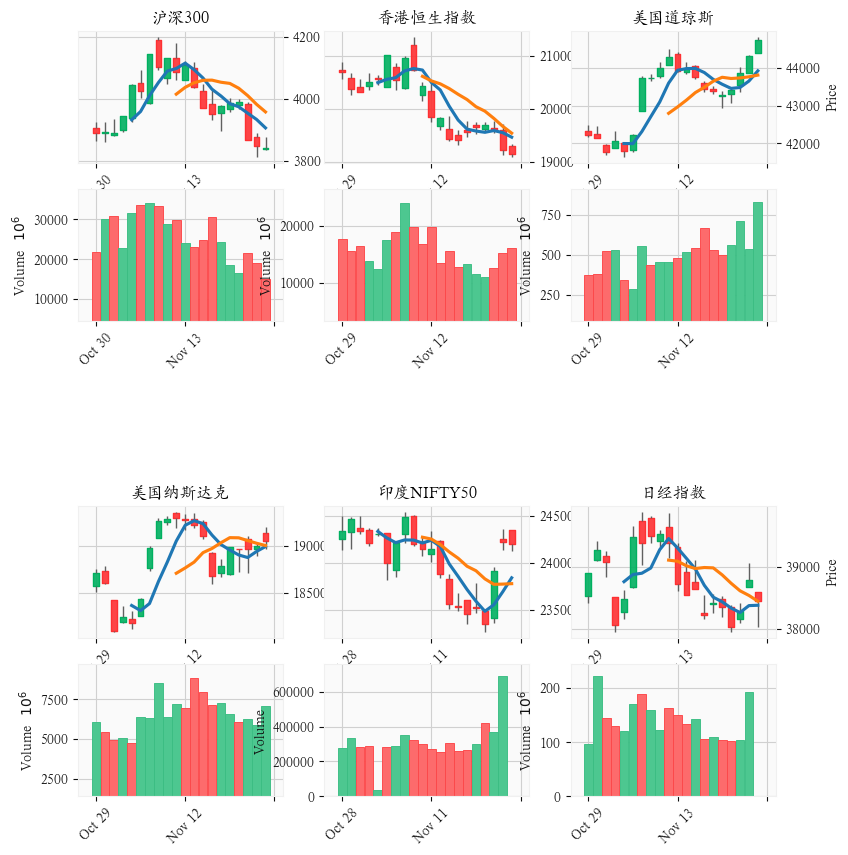

In [102]:
d=20  # 显示天数
plotSinaStocks(list(stock_daily.values()),d,indexNames,overlay=False)

### 2.2 衍生品市场
#### 2.2.1 中证50指数(与沪深300比较)

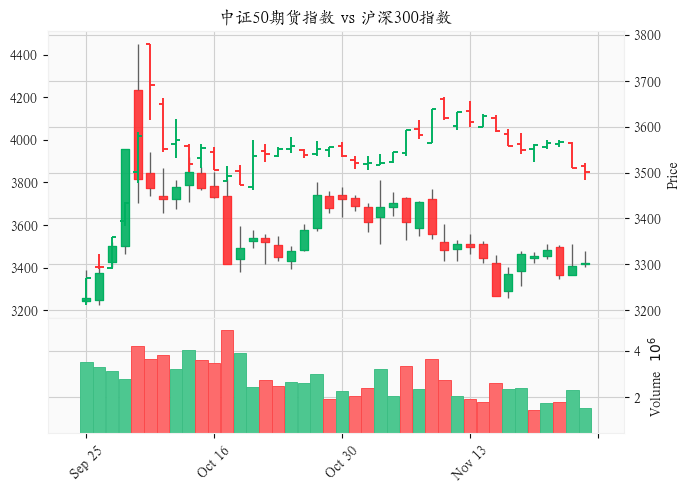

In [110]:
d=40
futures_zh_daily_sina_df = ak.futures_zh_daily_sina(symbol="RB0")
futures_zh_daily_sina_df['date']=pd.to_datetime(futures_zh_daily_sina_df['date'])
datatitle='中证50期货指数'
cointDF[datatitle]=futures_zh_daily_sina_df.set_index('date')['close']
plotSinaStocks([stock_ss_daily_df,futures_zh_daily_sina_df],d,['沪深300指数',datatitle])

#### 2.2.2 期权市场
当日行情

In [125]:
#沪深300当日行情
option_cffex_hs300_list_sina_df = ak.option_cffex_hs300_list_sina()
mainOption_hs300=list(option_cffex_hs300_list_sina_df.values())[0][0]
option_hs300_spot = ak.option_cffex_hs300_spot_sina(symbol=mainOption_hs300)
option_hs300_spot

,看涨合约-买量,看涨合约-买价,看涨合约-最新价,看涨合约-卖价,看涨合约-卖量,看涨合约-持仓量,看涨合约-涨跌,行权价,看涨合约-标识,看跌合约-买量,看跌合约-买价,看跌合约-最新价,看跌合约-卖价,看跌合约-卖量,看跌合约-持仓量,看跌合约-涨跌,看跌合约-标识
0,1,1023.0,1036.8,1045.8,1,140,1.23,2800,io2412C2800,6,0.4,0.4,0.6,4,720,0.00,io2412P2800
1,1,973.6,1000.0,995.8,1,47,2.63,2850,io2412C2850,5,0.4,0.6,0.6,4,311,50.00,io2412P2850
2,1,1074.0,1076.8,1097.8,1,148,0.07,2900,io2412C2900,14,0.4,0.6,0.8,16,549,0.00,io2412P2900
3,1,1177.4,1141.0,1199.6,1,33,-2.66,2950,io2412C2950,1,0.6,0.6,0.8,13,318,0.00,io2412P2950
4,1,827.8,806.0,847.6,1,179,-8.82,3000,io2412C3000,7,0.6,0.8,0.8,7,779,0.00,io2412P3000
5,1,1052.6,1049.8,1072.4,1,39,1.39,3050,io2412C3050,15,0.6,0.8,1.0,7,365,0.00,io2412P3050
6,1,729.0,705.6,747.0,1,219,-10.02,3100,io2412C3100,15,0.8,1.0,1.0,1,1018,0.00,io2412P3100
7,1,890.2,962.4,908.0,1,64,-0.04,3150,io2412C3150,15,1.0,1.4,1.4,11,327,40.00,io2412P3150
8,2,627.2,658.0,644.0,1,325,5.18,3200,io2412C3200,10,1.2,1.4,1.4,4,700,16.67,io2412P3200
9,2,578.6,580.0,594.4,1,57,-1.46,3250,io2412C3250,2,1.6,1.6,1.8,4,341,0.00,io2412P3250


In [127]:
#中证1000当日行情
option_zz1000_list_sina_df = ak.option_cffex_zz1000_list_sina()
mainOption_zz1000=list(option_zz1000_list_sina_df.values())[0][0]
option_zz1000_spot = ak.option_cffex_zz1000_spot_sina(symbol=mainOption_zz1000)
option_zz1000_spot

,看涨合约-买量,看涨合约-买价,看涨合约-最新价,看涨合约-卖价,看涨合约-卖量,看涨合约-持仓量,看涨合约-涨跌,行权价,看涨合约-标识,看跌合约-买量,看跌合约-买价,看跌合约-最新价,看跌合约-卖价,看跌合约-卖量,看跌合约-持仓量,看跌合约-涨跌,看跌合约-标识
0,1,2084.8,2159.8,2130.0,1,103,-0.35,3800,mo2412C3800,110,0.6,0.8,0.8,2,1037,0.00,mo2412P3800
1,1,2068.2,2027.6,2112.4,1,53,-3.74,3900,mo2412C3900,18,0.6,0.6,0.8,3,464,-25.00,mo2412P3900
2,1,1970.2,1972.6,2007.6,1,43,-1.69,4000,mo2412C4000,23,0.6,0.8,0.8,3,519,0.00,mo2412P4000
3,1,1920.6,1922.2,1957.6,1,20,-1.77,4050,mo2412C4050,6,0.6,0.6,0.8,13,266,-25.00,mo2412P4050
4,1,1787.6,1858.8,1828.6,1,116,1.26,4100,mo2412C4100,16,0.6,0.8,0.8,1,537,0.00,mo2412P4100
5,1,1738.6,1781.6,1778.8,1,30,-0.24,4150,mo2412C4150,4,0.6,0.6,0.8,5,276,-25.00,mo2412P4150
6,1,1689.0,1751.8,1728.0,1,79,-1.74,4200,mo2412C4200,7,0.8,0.8,1.0,6,769,0.00,mo2412P4200
7,1,1914.4,1923.2,1957.6,1,30,-0.81,4250,mo2412C4250,10,0.6,0.8,1.0,5,316,0.00,mo2412P4250
8,1,1590.4,1662.6,1628.0,1,152,1.61,4300,mo2412C4300,1,0.8,0.8,1.0,3,713,-20.00,mo2412P4300
9,1,1622.4,1561.0,1658.2,1,24,-5.84,4350,mo2412C4350,8,0.6,0.8,1.0,5,345,-20.00,mo2412P4350


折价溢价分析

In [128]:
option_premium_analysis_em_df = ak.option_premium_analysis_em()
option_premium_analysis_em_df

,期权代码,期权名称,最新价,涨跌幅,行权价,折溢价率,标的名称,标的最新价,标的涨跌幅,盈亏平衡价,到期日
0,10007852,科创50沽3月450,NaN,NaN,0.45,55.09,科创50ETF,1.002,-0.60,NaN,2025-03-26
1,10007850,科创50沽12月450,NaN,NaN,0.45,55.09,科创50ETF,1.002,-0.60,NaN,2024-12-25
2,10007830,科创板50沽3月450,NaN,NaN,0.45,53.85,科创板50ETF,0.975,-0.71,NaN,2025-03-26
3,10007828,科创板50沽12月450,NaN,NaN,0.45,53.85,科创板50ETF,0.975,-0.71,NaN,2024-12-25
4,10007924,科创50沽11月500,NaN,NaN,0.50,50.10,科创50ETF,1.002,-0.60,NaN,2024-11-27
...,...,...,...,...,...,...,...,...,...,...,...
723,10007559,科创50购12月500,NaN,NaN,0.50,-50.10,科创50ETF,1.002,-0.60,NaN,2024-12-25
724,10007829,科创板50购3月450,NaN,NaN,0.45,-53.85,科创板50ETF,0.975,-0.71,NaN,2025-03-26
725,10007827,科创板50购12月450,NaN,NaN,0.45,-53.85,科创板50ETF,0.975,-0.71,NaN,2024-12-25
726,10007851,科创50购3月450,NaN,NaN,0.45,-55.09,科创50ETF,1.002,-0.60,NaN,2025-03-26


### 2.3 各市场趋势协同性

#### 2.3.1 各国股市、衍生品市场资产价格协整性检验

In [111]:
import numpy as np
from statsmodels.tsa.stattools import coint

# 对齐时间序列数据
aligned_data = cointDF.dropna()

# 协整性检验和趋势分析
def analyze_cointegration(data):
    results = []
    for i in range(len(data.columns)):
        for j in range(i + 1, len(data.columns)):
            index1, index2 = data.columns[i], data.columns[j]
            series1, series2 = data.iloc[:, i], data.iloc[:, j]
            p_value = coint(series1, series2)[1]
            
            # 线性回归分析
            coeff = np.polyfit(series1, series2, 1)[0]
            trend = "相同趋向" if coeff > 0 else "相反趋向"
            
            # 保存结果
            results.append((index1, index2, p_value, trend))
    return pd.DataFrame(results, columns=["指数1", "指数2", "协整 p 值", "趋向"])

# 进行分析
results_df = analyze_cointegration(aligned_data)

# 美观显示结果表格
class DataFramePretty(object):
    def __init__(self, df: pd.DataFrame, min_max_cols=[]) -> None:
        self.data = df
        self.min_max_cols = min_max_cols

    def __set_min_max_style(self, df: pd.DataFrame):
        imax = self.data.idxmax()
        imin = self.data.idxmin()

        max_tmpl = "[b on red3]{}[/b on red3]"
        min_tmpl = "[i on green3]{}[/i on green3]"

        for col in self.min_max_cols:
            col_idx = imax.index.tolist().index(col)
            val = df.iloc[imax[col], col_idx]
            df.iloc[imax[col], col_idx] = max_tmpl.format(val)

            col_idx = imin.index.tolist().index(col)
            val = df.iloc[imin[col], col_idx]
            df.iloc[imin[col], col_idx] = min_tmpl.format(val)

    def show(self):
        table = Table(
            title="各市场协整性和趋向",
            title_style="i on dark_cyan",
            header_style="bold cyan",
        )

        df = self.data.copy()
        for col in df.columns:
            df[col] = df[col].astype("str")
            table.add_column(col)

        self.__set_min_max_style(df)

        for idx in range(len(df)):
            table.add_row(*df.iloc[idx].tolist())

        console = Console()
        console.print(table)

# 显示结果
pretty_df = DataFramePretty(results_df, min_max_cols=["协整 p 值"])
pretty_df.show()


                        各市场协整性和趋向                         
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ 指数1        ┃ 指数2          ┃ 协整 p 值            ┃ 趋向     ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ 沪深300      │ 香港恒生指数   │ 0.452287818337747    │ 相同趋向 │
│ 沪深300      │ 美国道琼斯     │ 0.436114244260675    │ 相同趋向 │
│ 沪深300      │ 美国纳斯达克   │ 0.4201572947995661   │ 相同趋向 │
│ 沪深300      │ 印度NIFTY50    │ 0.3391820670262027   │ 相同趋向 │
│ 沪深300      │ 日经指数       │ 0.4715749540891352   │ 相同趋向 │
│ 沪深300      │ 中证50期货指数 │ 0.15278927904194717  │ 相同趋向 │
│ 香港恒生指数 │ 美国道琼斯     │ 0.34398060879117154  │ 相反趋向 │
│ 香港恒生指数 │ 美国纳斯达克   │ 0.32485555855299464  │ 相反趋向 │
│ 香港恒生指数 │ 印度NIFTY50    │ 0.23341784547314248  │ 相反趋向 │
│ 香港恒生指数 │ 日经指数       │ 0.22789781020691008  │ 相反趋向 │
│ 香港恒生指数 │ 中证50期货指数 │ 0.5862070872448576   │ 相同趋向 │
│ 美国道琼斯   │ 美国纳斯达克   │ 0.15582775910679886  │ 相同趋向 │
│ 美国道琼斯   │ 印度NIFTY50    │ 0.3097083436183933   │ 相同趋向 │
│ 美国道琼斯   │ 日经指数       │ 0.16718646806654514  │ 相同趋向 │
│ 美国道琼斯   │ 中证50期货指数 │ 0.9221587846963226   │ 相同趋向 │
│ 美国纳斯达克 │ 印度NIFTY50    │ 0.5778271991802237   │ 相同趋向 │
│ 美国纳斯达克 │ 日经指数       │ 0.1878587672942143   │ 相同趋向 │
│ 美国纳斯达克 │ 中证50期货指数 │ 0.9414793182092122   │ 相同趋向 │
│ 印度NIFTY50  │ 日经指数       │ 0.004222735215312493 │ 相同趋向 │
│ 印度NIFTY50  │ 中证50期货指数 │ 0.9717154411014992   │ 相同趋向 │
│ 日经指数     │ 中证50期货指数 │ 0.8759507657846797   │ 相同趋向 │
└──────────────┴────────────────┴──────────────────────┴──────────┘

## 3. 板块热点
### 3.1 昨日热点10大板块
昨天涨停股票分布的板块

In [9]:
stock_zt_pool_em_df = ak.stock_zt_pool_em(date=lastday)
stock_zt_pool_em_df

,序号,代码,名称,涨跌幅,最新价,成交额,流通市值,总市值,换手率,封板资金,首次封板时间,最后封板时间,炸板次数,涨停统计,连板数,所属行业
0,1,000833,粤桂股份,10.010764,20.44,1638588672,9.273669e+09,1.639456e+10,17.700649,330381776,092500,093948,6,13/12,11,综合行业
1,2,002611,东方精工,10.028248,15.58,3275454528,1.550322e+10,1.899274e+10,21.137062,591511588,092500,093306,2,8/8,8,专用设备
2,3,002095,生 意 宝,10.018640,23.61,359611472,5.942836e+09,5.966719e+09,6.056880,145457621,092500,093054,1,5/5,5,互联网服
3,4,002103,广博股份,9.958507,10.60,258785453,3.996997e+09,5.663293e+09,6.474497,212821266,092500,092500,0,7/5,4,家用轻工
4,5,002175,东方智造,10.000000,4.51,32154410,5.758247e+09,5.758281e+09,0.558406,412762501,092500,092500,0,4/4,4,仪器仪表
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,153,002403,爱仕达,9.980431,16.86,1266081888,5.010142e+09,5.743166e+09,26.855474,45755342,145006,145006,0,16/9,5,家电行业
153,154,603655,朗博科技,9.987196,25.77,193089991,2.731620e+09,2.731620e+09,7.599057,15732585,145030,145257,1,2/2,2,汽车零部
154,155,600119,长江投资,9.989259,10.24,411002128,3.740369e+09,3.740369e+09,11.810925,25447608,145234,145234,0,4/2,1,物流行业
155,156,301268,铭利达,20.022184,21.64,109338238,3.895334e+09,8.656232e+09,3.101539,34226516,145409,145409,0,1/1,1,通用设备


In [10]:
#返回当日涨停股票DataFrame
def limitupList(date):
    collist=['所属行业','代码','名称','涨跌幅','首次封板时间','最后封板时间','炸板次数','涨停统计','连板数']
    stock_zt_pool_em_df = ak.stock_zt_pool_em(date=date)
    last_hs_10=stock_zt_pool_em_df[collist]
    return last_hs_10

last_hs_10=limitupList(lastday)
last_hs_10

,所属行业,代码,名称,涨跌幅,首次封板时间,最后封板时间,炸板次数,涨停统计,连板数
0,综合行业,000833,粤桂股份,10.010764,092500,093948,6,13/12,11
1,专用设备,002611,东方精工,10.028248,092500,093306,2,8/8,8
2,互联网服,002095,生 意 宝,10.018640,092500,093054,1,5/5,5
3,家用轻工,002103,广博股份,9.958507,092500,092500,0,7/5,4
4,通信服务,002467,二六三,10.049423,092500,092500,0,7/5,4
...,...,...,...,...,...,...,...,...,...
152,家电行业,002403,爱仕达,9.980431,145006,145006,0,16/9,5
153,汽车零部,603655,朗博科技,9.987196,145030,145257,1,2/2,2
154,物流行业,600119,长江投资,9.989259,145234,145234,0,4/2,1
155,通用设备,301268,铭利达,20.022184,145409,145409,0,1/1,1


热点追踪：涨停行业汇总明细

In [11]:
grouped_df=last_hs_10.groupby('所属行业',observed=False).size().reset_index(name='计数')
grouped_df['占比']=grouped_df['计数']/grouped_df['计数'].sum()

sort_df=grouped_df.sort_values(by='计数', ascending=False)
sort_df.head(20)

,所属行业,计数,占比
0,专用设备,14,0.089172
25,汽车零部,9,0.057325
38,纺织服装,9,0.057325
51,通用设备,6,0.038217
1,互联网服,6,0.038217
21,文化传媒,6,0.038217
7,化学制品,5,0.031847
2,仪器仪表,5,0.031847
16,家电行业,5,0.031847
36,电池,4,0.025478


In [12]:
top_10 = sort_df.head(10)
total_cumulative = top_10['占比'].sum()
judge='集中' if total_cumulative>0.5 else '不集中'
print(f'前10板块涨幅靠前累计占比：{total_cumulative}, 热点{judge}。')

前10板块涨幅靠前累计占比：0.4394904458598726, 热点不集中。


#### 2.2.7 板块动态评析

本轮行情启动股票热点追踪（待完善）

In [13]:
from datetime import datetime, timedelta

def get_stock_zt_pool(start_date, end_date):
    current_date = datetime.strptime(start_date, '%Y%m%d')
    end_date = datetime.strptime(end_date, '%Y%m%d')
    
    concat_zt_df = pd.DataFrame()

    while current_date <= end_date:
        date_str = current_date.strftime('%Y%m%d')
        try:
            stock_zt_pool_strong_em_df = ak.stock_zt_pool_previous_em(date=date_str)
            stock_zt_pool_strong_em_df['日期'] = pd.to_datetime(date_str)
            concat_zt_df = pd.concat([concat_zt_df, stock_zt_pool_strong_em_df], ignore_index=True)
        except Exception as e:
            print(f"Error fetching data for {date_str}: {e}")
        
        current_date += timedelta(days=1)
    
    return concat_zt_df

In [14]:
syclestart='20240925'
#ak.stock_zt_pool_strong_em(date=syclestart)

## 4.个股趋势分析

In [15]:
def plotDcStockSingle(df,days,title):
    OCHLVDict={'日期':'Date','开盘':'Open','收盘':'Close','最高':'High','最低':'Low','成交量':'Volume'}
    print(f'{days}K线图')
    plotStock(df.tail(days),OCHLVDict,title)

#根据代码获取股票信息
#symbol:若是字符串，则返回单个股信息；若是列表，则遍历元素，返回相应列表。
def getStockInfo(symbol):
    if type(symbol).__name__=='str':
        stocknamedf=ak.stock_individual_info_em(symbol=symbol)
        stockname=stocknamedf.loc[stocknamedf['item']=='股票简称','value'][1]
        stockIPO=stocknamedf.loc[stocknamedf['item']=='上市时间','value'][7]
        stockIndustry=stocknamedf.loc[stocknamedf['item']=='行业','value'][6]
        stockTAmount=stocknamedf.loc[stocknamedf['item']=='总股本','value'][2]
        stockFAmount=stocknamedf.loc[stocknamedf['item']=='流通股','value'][3]
        stockTValue=stocknamedf.loc[stocknamedf['item']=='总市值','value'][4]
        stockFValue=stocknamedf.loc[stocknamedf['item']=='流通市值','value'][5]
    else:
        stockname,stockIPO,stockIndustry,stockTAmount,stockFAmount,stockTValue,stockFValue=[],[],[],[],[],[],[]
        for sym in symbol:
            stocknamedf=ak.stock_individual_info_em(symbol=sym)
            stockname.append(stocknamedf.loc[stocknamedf['item']=='股票简称','value'][1])
            stockIPO.append(stocknamedf.loc[stocknamedf['item']=='上市时间','value'][7])
            stockIndustry.append(stocknamedf.loc[stocknamedf['item']=='行业','value'][6])
            stockTAmount.append(stocknamedf.loc[stocknamedf['item']=='总股本','value'][2])
            stockFAmount.append(stocknamedf.loc[stocknamedf['item']=='流通股','value'][3])
            stockTValue.append(stocknamedf.loc[stocknamedf['item']=='总市值','value'][4])
            stockFValue.append(stocknamedf.loc[stocknamedf['item']=='流通市值','value'][5])
            
    return {'名称':stockname,'IPO':stockIPO,'行业':stockIndustry,'总股本':stockTAmount,'流通股':stockFAmount,'总市值':stockTValue,'流通市值':stockFValue}

#画指定周期的股票烛线图
def plotDcStocks(stocksymb,periods):
    stockDict={}
    for p in periods:
        stockdf = ak.stock_zh_a_hist(symbol=stocksymb,period=p)
        stockname=getStockInfo(stocksymb)['名称']
        stockDict[p]=stockdf
        pstr='日' if p=='daily' else '周' if p=='weekly' else '月'
        print(f'{stockname}-周期：{pstr}\n{stockdf}')
        plotDcStockSingle(stockdf,100,f'{stockname}(周期：{pstr})的历史走势')
    stockDict['name']=stockname
    return stockDict

from rich.console import Console
from rich.table import Table

#美观显示DataFrame表格
class DataFramePretty(object):
    def __init__(self, df: pd.DataFrame, min_max_cols=[]) -> None:
        self.data = df
        self.min_max_cols = min_max_cols

    def __set_min_max_style(self, df: pd.DataFrame):
        imax = self.data.idxmax()
        imin = self.data.idxmin()

        max_tmpl = "[b on red3]{}[/b on red3]"
        min_tmpl = "[i on green3]{}[/i on green3]"

        for col in self.min_max_cols:
            col_idx = imax.index.tolist().index(col)
            val = df.iloc[imax[col], col_idx]
            df.iloc[imax[col], col_idx] = max_tmpl.format(val)

            col_idx = imin.index.tolist().index(col)
            val = df.iloc[imin[col], col_idx]
            df.iloc[imin[col], col_idx] = min_tmpl.format(val)

    def show(self):
        table = Table(
            title="DataFrame",
            title_style="i on dark_cyan",
            header_style="bold cyan",
        )

        # self.data是原始数据
        # df 是用来显示的数据
        df = self.data.copy()
        for col in df.columns:
            df[col] = df[col].astype("str")
            table.add_column(col)

        self.__set_min_max_style(df)

        for idx in range(len(df)):
            table.add_row(*df.iloc[idx].tolist())

        console = Console()
        console.print(table)

### 4.1 跟进股票列表

In [16]:
focusStocks=['300576','600839','600157','000717','002607','600127','600605','600217','300727','301421','002843','600968','300159','601688','600919']
getInfo=getStockInfo(focusStocks)
Analist=pd.DataFrame({'代码':focusStocks,'名称':getInfo['名称'],'IPO':getInfo['IPO'],'行业':getInfo['行业'],'流通股':getInfo['流通股'],'总股本':getInfo['总股本']})
Analist['流通股']=Analist['流通股'].astype(int)
Analist['总股本']=Analist['总股本'].astype(int)
Analist['流通率']=Analist['流通股']/Analist['总股本']
Analist

,代码,名称,IPO,行业,流通股,总股本,流通率
0,300576,容大感光,20161220,电子化学品,183530814,295708699,0.620647
1,600839,四川长虹,19940311,家电行业,4614958631,4616244222,0.999722
2,600157,永泰能源,19980513,电力行业,22217764145,22217764145,1.000000
3,000717,中南股份,19970508,钢铁行业,2423523840,2423845590,0.999867
4,002607,中公教育,20110810,教育,5028744315,6167399389,0.815375
5,600127,金健米业,19980506,农牧饲渔,641783218,641783218,1.000000
6,600605,汇通能源,19920327,房地产服务,206282429,206282429,1.000000
7,600217,中再资环,19991216,环保行业,1388659782,1657653673,0.837726
8,300727,润禾材料,20171127,化学制品,113888282,127725100,0.891667
9,301421,波长光电,20230823,光学光电子,46308485,115718000,0.400184


### 4.2 历史走势

容大感光-周期：日
              日期    股票代码     开盘     收盘     最高     最低     成交量          成交额  \
0     2016-12-20  300576   9.89  11.87  11.87   9.89      84      98035.0   
1     2016-12-21  300576  13.06  13.06  13.06  13.06      20      26120.0   
2     2016-12-22  300576  14.37  14.37  14.37  14.37      11      15807.0   
3     2016-12-23  300576  15.81  15.81  15.81  15.81      35      55335.0   
4     2016-12-26  300576  17.39  17.39  17.39  17.39      39      67821.0   
...          ...     ...    ...    ...    ...    ...     ...          ...   
1911  2024-11-19  300576  50.53  51.95  52.11  50.05  150348  769530229.0   
1912  2024-11-20  300576  51.45  52.56  53.26  50.96  170605  886638136.0   
1913  2024-11-21  300576  52.07  51.62  52.43  50.61  135283  699722341.0   
1914  2024-11-22  300576  51.20  48.50  52.19  48.49  156799  788802684.0   
1915  2024-11-25  300576  48.63  49.29  49.48  47.69  112094  545213939.0   

         振幅    涨跌幅   涨跌额   换手率  
0     24.03  44.05  3.63  0.04  

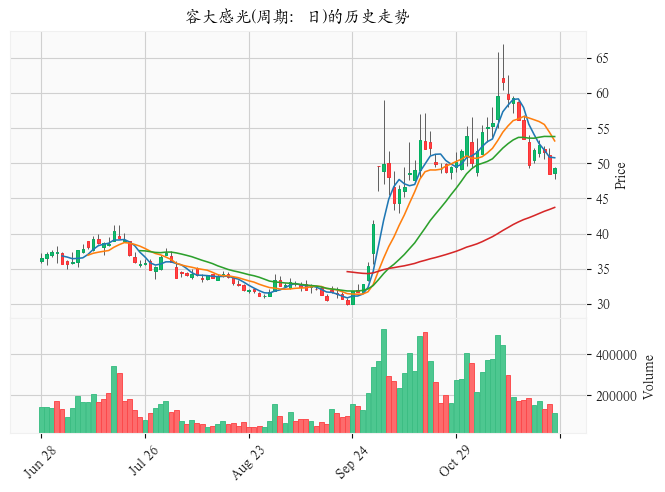

容大感光-周期：周
             日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0    2016-12-23  300576   9.89  15.81  15.81   9.89      150  1.952970e+05   
1    2016-12-30  300576  17.39  25.45  25.45  17.39      239  5.274280e+05   
2    2017-01-06  300576  28.00  37.27  37.27  28.00     1382  4.588265e+06   
3    2017-01-13  300576  41.00  44.99  49.00  41.00   274981  1.270494e+09   
4    2017-01-20  300576  44.10  41.00  44.30  38.47   266327  1.094907e+09   
..          ...     ...    ...    ...    ...    ...      ...           ...   
399  2024-11-01  300576  48.75  50.02  56.56  47.76  1481663  7.649311e+09   
400  2024-11-08  300576  48.71  59.60  65.80  48.20  1778161  9.926174e+09   
401  2024-11-15  300576  62.10  53.52  66.96  53.52  1284336  7.678084e+09   
402  2024-11-22  300576  53.07  48.50  53.99  48.49   798775  4.093327e+09   
403  2024-11-25  300576  48.63  49.29  49.48  47.69   112094  5.452139e+08   

        振幅    涨跌幅    涨跌额     换手率  
0    71.84  91.87 

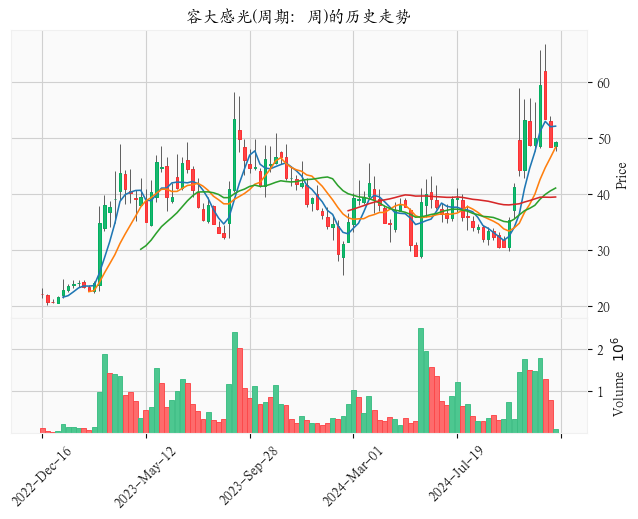

容大感光-周期：月
            日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0   2016-12-30  300576   9.89  25.45  25.45   9.89      389  7.227250e+05   
1   2017-01-26  300576  28.00  41.80  49.00  28.00   645691  2.793503e+09   
2   2017-02-28  300576  42.00  46.25  46.48  40.60   577638  2.535418e+09   
3   2017-03-31  300576  46.23  44.79  52.50  44.40   625741  3.038817e+09   
4   2017-04-28  300576  43.99  40.30  46.98  36.08   185168  7.561082e+08   
..         ...     ...    ...    ...    ...    ...      ...           ...   
91  2024-07-31  300576  36.57  36.60  41.20  33.53  3828562  1.447531e+10   
92  2024-08-30  300576  36.96  33.38  38.00  30.90  1650007  5.620156e+09   
93  2024-09-30  300576  33.45  41.38  41.97  29.78  2197749  7.319578e+09   
94  2024-10-31  300576  49.66  53.82  58.98  42.87  5840792  2.935311e+10   
95  2024-11-25  300576  53.00  49.29  66.96  47.69  4331061  2.415482e+10   

        振幅     涨跌幅    涨跌额     换手率  
0   188.83  208.86  17.21    

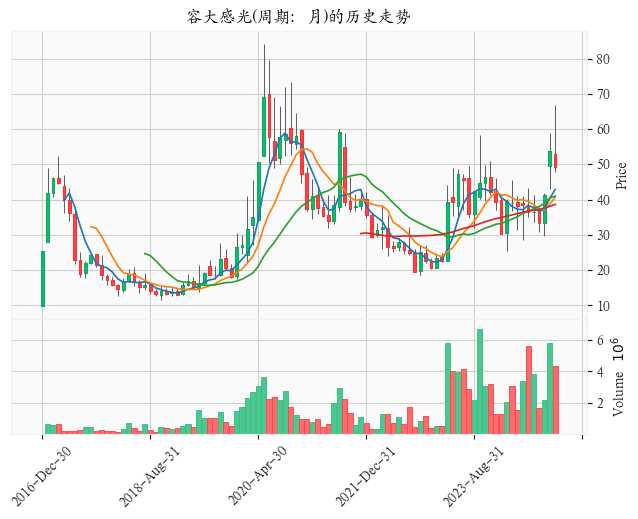

四川长虹-周期：日
              日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0     1994-03-11  600839  16.80  19.69  20.50  16.60   261990  4.998470e+08   
1     1994-03-14  600839  21.00  19.80  21.50  19.40   107229  2.192590e+08   
2     1994-03-15  600839  19.80  19.25  20.48  19.12    37734  7.467700e+07   
3     1994-03-16  600839  19.20  19.28  20.02  19.10    24602  4.795900e+07   
4     1994-03-17  600839  19.55  18.60  19.59  18.02    16785  3.193100e+07   
...          ...     ...    ...    ...    ...    ...      ...           ...   
7291  2024-11-19  600839  11.11  12.09  12.25  11.11  5941130  6.928205e+09   
7292  2024-11-20  600839  11.86  12.19  12.48  11.72  5766263  6.954592e+09   
7293  2024-11-21  600839  12.27  13.41  13.41  12.01  9693568  1.276361e+10   
7294  2024-11-22  600839  13.27  12.11  13.30  12.09  8767438  1.115214e+10   
7295  2024-11-25  600839  11.66  11.44  11.98  11.18  5240680  6.027485e+09   

          振幅      涨跌幅    涨跌额    换手率  
0  

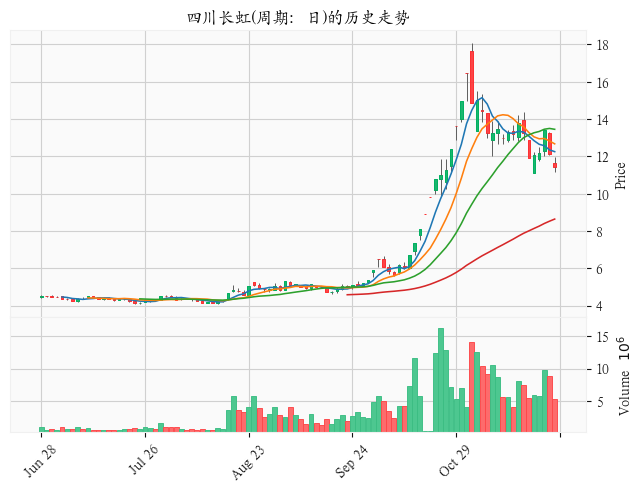

四川长虹-周期：周
              日期    股票代码     开盘     收盘     最高     最低       成交量           成交额  \
0     1994-03-11  600839  16.80  19.69  20.50  16.60    261990  4.998470e+08   
1     1994-03-18  600839  21.00  17.70  21.50  17.40    209638  4.154680e+08   
2     1994-03-25  600839  17.40  15.39  17.41  15.20     71628  1.181880e+08   
3     1994-04-01  600839  15.00  15.48  16.80  14.62    102736  1.609320e+08   
4     1994-04-08  600839  15.50  15.65  16.59  15.40     64293  1.025340e+08   
...          ...     ...    ...    ...    ...    ...       ...           ...   
1527  2024-11-01  600839  11.48  14.83  18.07  11.13  37351770  5.503133e+10   
1528  2024-11-08  600839  13.38  13.44  15.50  12.00  51422898  7.043653e+10   
1529  2024-11-15  600839  13.00  13.23  14.36  12.66  30747701  4.121999e+10   
1530  2024-11-22  600839  12.89  12.11  13.41  11.11  35660221  4.443267e+10   
1531  2024-11-25  600839  11.66  11.44  11.98  11.18   5240680  6.027485e+09   

          振幅      涨跌幅    涨跌额 

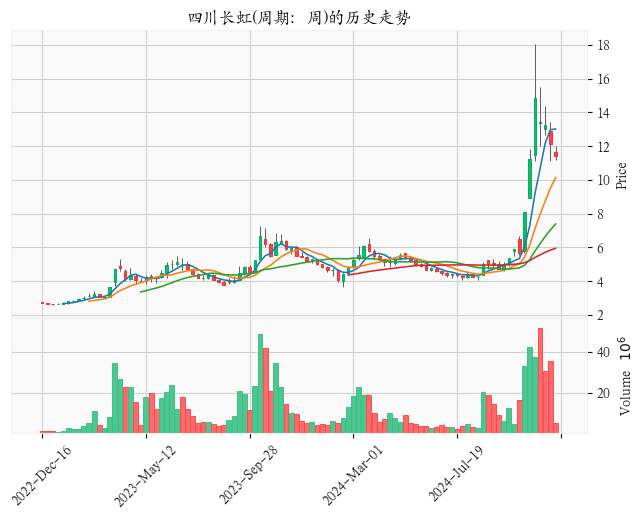

四川长虹-周期：月
             日期    股票代码     开盘     收盘     最高     最低        成交量           成交额  \
0    1994-03-31  600839  16.80  15.41  21.50  14.62     638439  1.182779e+09   
1    1994-04-29  600839  15.59  12.91  16.59  12.40     268187  3.796230e+08   
2    1994-05-31  600839  13.00  13.90  16.10  12.86     351145  5.016150e+08   
3    1994-06-30  600839  13.98   9.28  14.75   9.08     243446  2.901890e+08   
4    1994-07-29  600839   9.20   7.33   9.22   7.15     143116  1.147780e+08   
..          ...     ...    ...    ...    ...    ...        ...           ...   
361  2024-07-31  600839   4.51   4.52   4.54   4.06   15152279  6.591300e+09   
362  2024-08-30  600839   4.52   5.04   5.28   4.09   47096018  2.259755e+10   
363  2024-09-30  600839   5.07   5.91   5.91   4.60   46917533  2.402882e+10   
364  2024-10-31  600839   6.50  16.48  16.48   5.56  114808656  1.102268e+11   
365  2024-11-25  600839  17.62  11.44  18.07  11.11  137175822  1.849614e+11   

         振幅      涨跌幅    涨跌额  

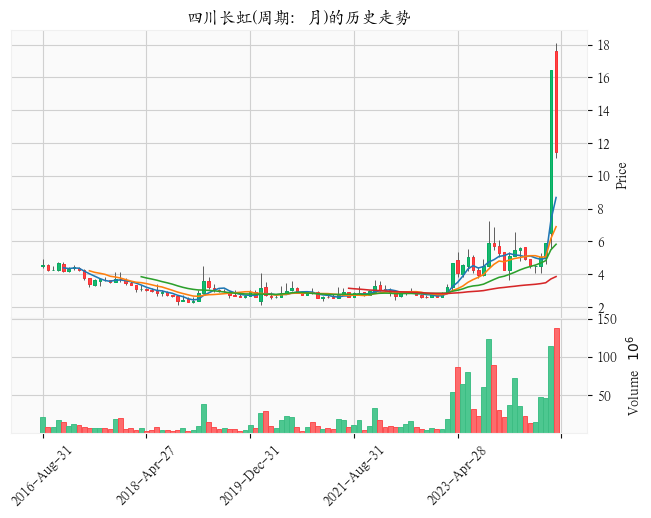

永泰能源-周期：日
              日期    股票代码     开盘     收盘     最高     最低       成交量           成交额  \
0     1998-05-13  600157  26.00  27.75  29.48  26.00     50950  1.408840e+08   
1     1998-05-14  600157  27.78  25.45  28.10  25.30     20929  5.531800e+07   
2     1998-05-15  600157  25.02  24.60  25.58  24.31     15781  3.924200e+07   
3     1998-05-18  600157  24.50  23.81  24.50  23.76     11755  2.827300e+07   
4     1998-05-19  600157  23.80  23.50  23.80  22.08     16182  3.712100e+07   
...          ...     ...    ...    ...    ...    ...       ...           ...   
5868  2024-11-19  600157   1.71   1.68   1.73   1.61  22404727  3.749061e+09   
5869  2024-11-20  600157   1.65   1.69   1.72   1.63  13419648  2.246829e+09   
5870  2024-11-21  600157   1.67   1.64   1.68   1.63  10649137  1.755277e+09   
5871  2024-11-22  600157   1.63   1.58   1.65   1.58   9957465  1.607038e+09   
5872  2024-11-25  600157   1.58   1.55   1.59   1.52   9125197  1.416988e+09   

          振幅      涨跌幅    涨跌额 

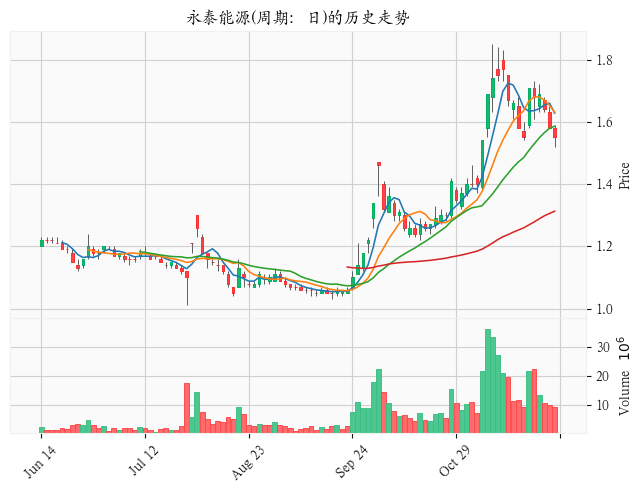

永泰能源-周期：周
              日期    股票代码     开盘     收盘     最高     最低        成交量           成交额  \
0     1998-05-15  600157  26.00  24.60  29.48  24.31      87660  2.354440e+08   
1     1998-05-22  600157  24.50  24.95  25.18  22.08      51987  1.233330e+08   
2     1998-05-29  600157  25.48  23.75  27.28  23.20      26008  6.372000e+07   
3     1998-06-05  600157  24.20  24.75  25.17  23.36      13361  3.240100e+07   
4     1998-06-12  600157  24.90  25.89  25.98  24.05      26943  6.759000e+07   
...          ...     ...    ...    ...    ...    ...        ...           ...   
1246  2024-11-01  600157   1.30   1.40   1.46   1.29   55628910  7.675794e+09   
1247  2024-11-08  600157   1.42   1.75   1.85   1.37  125260905  2.073517e+10   
1248  2024-11-15  600157   1.80   1.55   1.83   1.54   72823338  1.221293e+10   
1249  2024-11-22  600157   1.59   1.58   1.73   1.58   78035337  1.299571e+10   
1250  2024-11-25  600157   1.58   1.55   1.59   1.52    9125197  1.416988e+09   

          振幅     

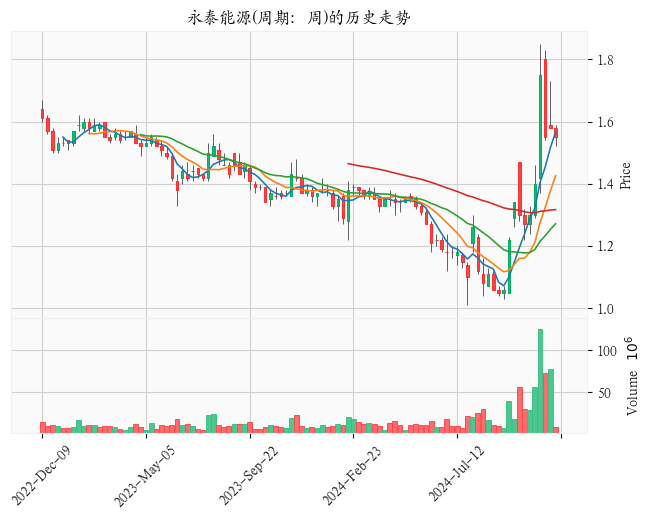

永泰能源-周期：月
             日期    股票代码     开盘     收盘     最高     最低        成交量           成交额  \
0    1998-05-29  600157  26.00  23.75  29.48  22.08     165655  4.224970e+08   
1    1998-06-30  600157  24.20  27.03  27.55  23.36     108225  2.785490e+08   
2    1998-07-31  600157  27.10  14.80  28.00  14.60     103495  2.595380e+08   
3    1998-08-31  600157  14.75  17.39  17.48  13.00     313861  5.006800e+08   
4    1998-09-30  600157  17.38  22.09  22.23  16.90     581358  1.173200e+09   
..          ...     ...    ...    ...    ...    ...        ...           ...   
298  2024-07-24  600157   1.18   1.10   1.20   1.01   48819005  5.461865e+09   
299  2024-08-30  600157   1.21   1.11   1.30   1.04   92433026  1.058989e+10   
300  2024-09-30  600157   1.11   1.34   1.34   1.03   85680836  9.881254e+09   
301  2024-10-31  600157   1.47   1.40   1.47   1.22  160019432  2.145430e+10   
302  2024-11-25  600157   1.40   1.55   1.85   1.37  296227517  4.891964e+10   

         振幅      涨跌幅    涨跌额  

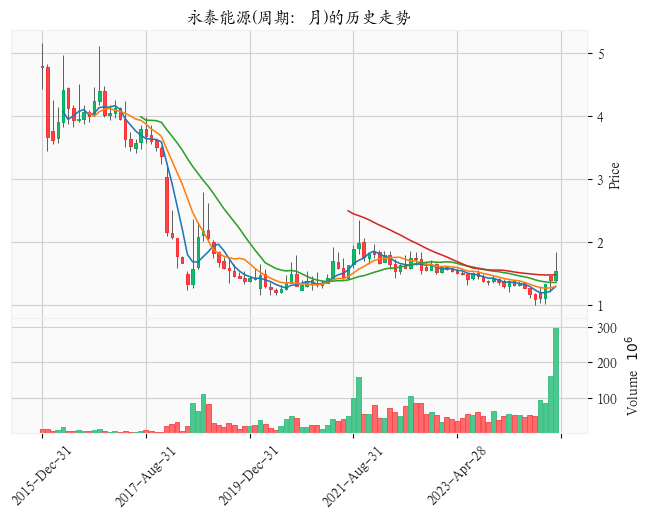

中南股份-周期：日
              日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0     1997-05-08  000717  15.00  15.08  16.50  14.88   404038  6.229113e+08   
1     1997-05-09  000717  15.20  15.31  15.59  14.65   101964  1.543605e+08   
2     1997-05-12  000717  15.50  16.16  16.48  15.35   114675  1.825065e+08   
3     1997-05-13  000717  16.00  15.33  16.10  15.00    55829  8.628832e+07   
4     1997-05-14  000717  15.20  14.92  15.70  14.70    45290  6.859488e+07   
...          ...     ...    ...    ...    ...    ...      ...           ...   
6511  2024-11-19  000717   3.11   3.01   3.12   2.80  2086720  6.240142e+08   
6512  2024-11-20  000717   2.91   2.94   2.97   2.82  1249250  3.617290e+08   
6513  2024-11-21  000717   2.93   2.85   2.93   2.83   838952  2.397628e+08   
6514  2024-11-22  000717   2.83   2.72   2.85   2.70   681450  1.896036e+08   
6515  2024-11-25  000717   2.72   2.75   2.76   2.68   469877  1.280554e+08   

         振幅    涨跌幅   涨跌额    换手率  
0     2

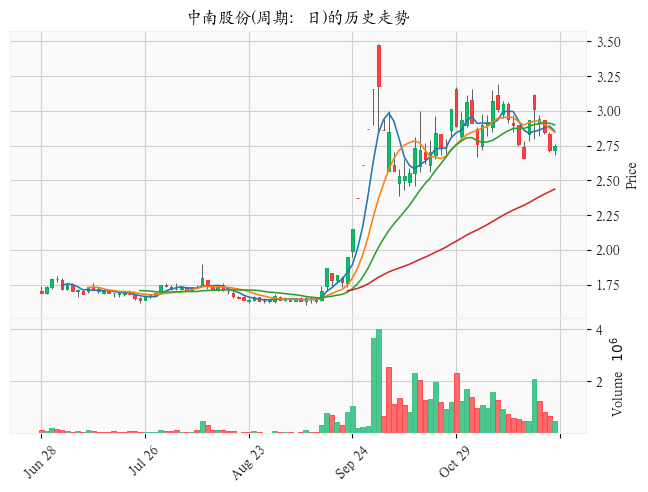

中南股份-周期：周
              日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0     1997-05-09  000717  15.00  15.31  16.50  14.65   506002  7.772718e+08   
1     1997-05-16  000717  15.50  13.65  16.48  13.64   276068  4.250346e+08   
2     1997-05-23  000717  13.75  11.93  14.25  11.23    91812  1.190401e+08   
3     1997-05-30  000717  12.00  12.33  12.58  11.11    77878  9.439885e+07   
4     1997-06-06  000717  12.60  11.70  13.78  11.48   108740  1.383512e+08   
...          ...     ...    ...    ...    ...    ...      ...           ...   
1367  2024-11-01  000717   2.86   2.91   3.17   2.78  7901891  2.364993e+09   
1368  2024-11-08  000717   2.87   3.01   3.19   2.67  5945500  1.745462e+09   
1369  2024-11-15  000717   2.98   2.66   3.07   2.65  3320904  9.637028e+08   
1370  2024-11-22  000717   2.83   2.72   3.12   2.70  5361007  1.561821e+09   
1371  2024-11-25  000717   2.72   2.75   2.76   2.68   469877  1.280554e+08   

         振幅    涨跌幅   涨跌额    换手率  
0     2

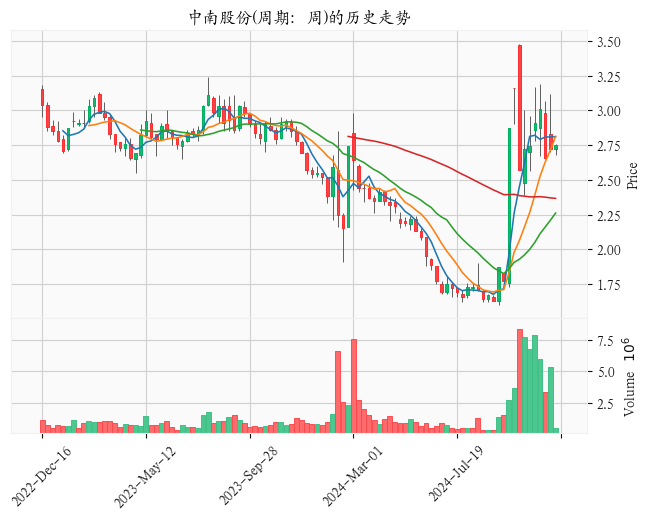

中南股份-周期：月
             日期    股票代码     开盘     收盘     最高     最低       成交量           成交额  \
0    1997-05-30  000717  15.00  12.33  16.50  11.11    951760  1.415745e+09   
1    1997-06-27  000717  12.60  11.03  13.78  10.00    284715  3.376285e+08   
2    1997-07-31  000717  11.08  11.36  12.30   8.50    324634  3.536508e+08   
3    1997-08-29  000717  11.42  13.24  13.45  10.70    448211  5.556319e+08   
4    1997-09-30  000717  13.24  10.60  13.80  10.01    224776  2.796126e+08   
..          ...     ...    ...    ...    ...    ...       ...           ...   
322  2024-07-31  000717   1.69   1.75   1.81   1.62   2367821  4.057305e+08   
323  2024-08-30  000717   1.75   1.67   1.90   1.62   2600085  4.487682e+08   
324  2024-09-30  000717   1.66   3.16   3.16   1.60   9486634  2.279026e+09   
325  2024-10-31  000717   3.47   3.06   3.48   2.39  29285152  8.299233e+09   
326  2024-11-25  000717   3.08   2.75   3.19   2.65  16486770  4.818161e+09   

        振幅    涨跌幅   涨跌额     换手率  
0    69

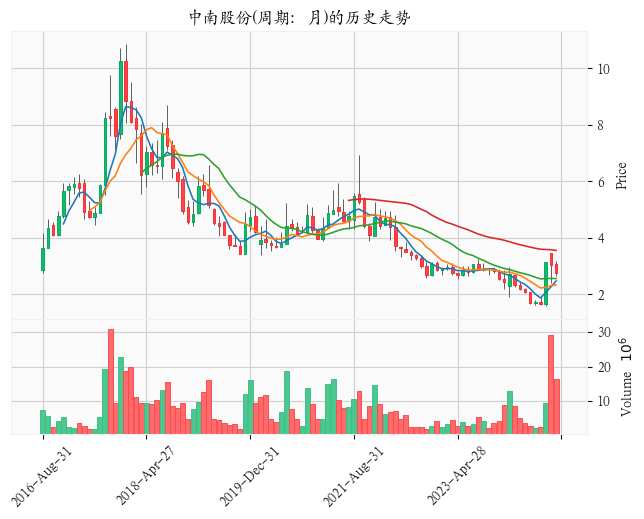

中公教育-周期：日
              日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0     2011-08-10  002607  30.00  32.18  33.86  29.52   161271  4.966592e+08   
1     2011-08-11  002607  31.19  32.80  33.60  30.50   116301  3.724757e+08   
2     2011-08-12  002607  32.14  31.51  32.55  31.31    73108  2.335276e+08   
3     2011-08-15  002607  31.80  31.79  32.80  31.21    55643  1.782103e+08   
4     2011-08-16  002607  32.38  33.42  34.14  32.31    79851  2.668497e+08   
...          ...     ...    ...    ...    ...    ...      ...           ...   
3047  2024-11-19  002607   3.05   3.17   3.21   2.98  5250929  1.608283e+09   
3048  2024-11-20  002607   3.17   3.23   3.27   3.13  3863812  1.236501e+09   
3049  2024-11-21  002607   3.20   3.15   3.21   3.12  2972568  9.393176e+08   
3050  2024-11-22  002607   3.14   3.03   3.22   3.02  3355032  1.051227e+09   
3051  2024-11-25  002607   3.03   3.28   3.33   3.02  6539661  2.110357e+09   

         振幅    涨跌幅   涨跌额    换手率  
0     1

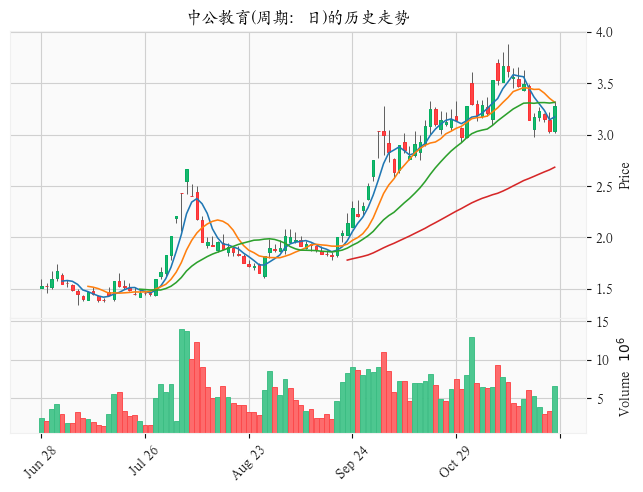

中公教育-周期：周
             日期    股票代码     开盘     收盘     最高     最低       成交量           成交额  \
0    2011-08-12  002607  30.00  31.51  33.86  29.52    350680  1.102663e+09   
1    2011-08-19  002607  31.80  32.25  34.79  31.21    279449  9.294257e+08   
2    2011-08-26  002607  32.04  34.12  34.90  31.51    198923  6.616502e+08   
3    2011-09-02  002607  34.55  31.11  35.49  30.63    131499  4.339269e+08   
4    2011-09-09  002607  30.61  31.32  32.86  29.70     92435  2.897783e+08   
..          ...     ...    ...    ...    ...    ...       ...           ...   
641  2024-11-01  002607   3.07   3.30   3.61   2.93  40812401  1.323441e+10   
642  2024-11-08  002607   3.30   3.53   3.73   3.09  35575374  1.189691e+10   
643  2024-11-15  002607   3.51   3.49   3.88   3.42  28121920  1.017785e+10   
644  2024-11-22  002607   3.47   3.03   3.49   2.98  21508210  6.798274e+09   
645  2024-11-25  002607   3.03   3.28   3.33   3.02   6539661  2.110357e+09   

        振幅    涨跌幅   涨跌额     换手率  
0    19

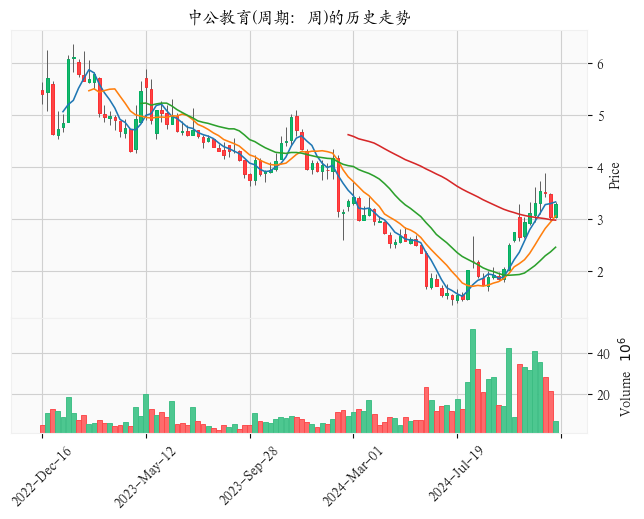

中公教育-周期：月
             日期    股票代码     开盘     收盘     最高     最低        成交量           成交额  \
0    2011-08-31  002607  30.00  32.00  35.49  29.52     924449  3.014597e+09   
1    2011-09-30  002607  32.11  29.70  32.86  28.12     234018  7.179579e+08   
2    2011-10-31  002607  30.20  32.08  32.60  28.72     117804  3.644960e+08   
3    2011-11-30  002607  31.84  30.37  34.99  30.00     106545  3.529074e+08   
4    2011-12-30  002607  30.95  28.30  31.42  26.50      51120  1.486839e+08   
..          ...     ...    ...    ...    ...    ...        ...           ...   
150  2024-07-31  002607   1.53   1.66   1.74   1.34   69006333  1.054550e+10   
151  2024-08-30  002607   1.65   1.88   2.67   1.61  145149352  3.006628e+10   
152  2024-09-30  002607   1.87   2.75   2.75   1.78  108019708  2.306162e+10   
153  2024-10-31  002607   3.03   3.28   3.33   2.58  126845266  3.821038e+10   
154  2024-11-25  002607   3.50   3.28   3.88   2.98  104738427  3.549431e+10   

        振幅    涨跌幅   涨跌额     换

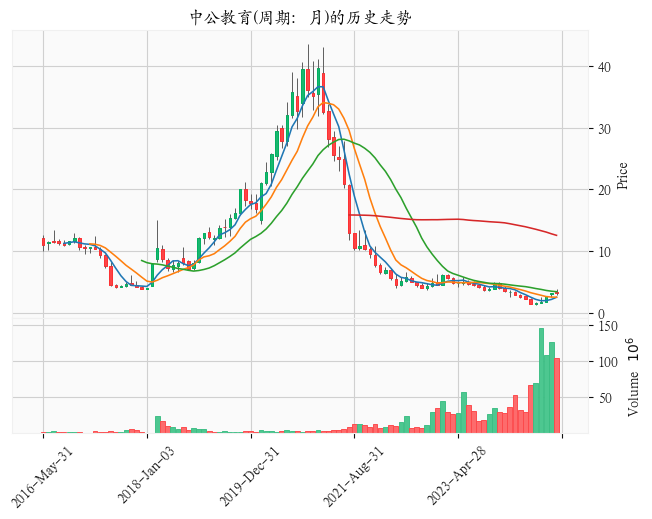

金健米业-周期：日
              日期    股票代码     开盘     收盘     最高     最低     成交量          成交额  \
0     1998-05-06  600127  16.61  17.05  17.30  16.01  301517  506241000.0   
1     1998-05-07  600127  17.10  16.65  17.47  16.49   89043  150529000.0   
2     1998-05-08  600127  16.66  16.78  17.04  16.00   59061   97772000.0   
3     1998-05-11  600127  16.90  15.80  16.90  15.55   55894   89285000.0   
4     1998-05-12  600127  15.65  15.15  15.65  15.01   25683   39051000.0   
...          ...     ...    ...    ...    ...    ...     ...          ...   
6296  2024-11-19  600127   6.91   6.94   6.95   6.81  118776   81715833.0   
6297  2024-11-20  600127   6.93   7.02   7.03   6.91  133687   93280649.0   
6298  2024-11-21  600127   6.99   6.99   7.01   6.93  107849   75183056.0   
6299  2024-11-22  600127   7.03   7.07   7.31   6.95  397037  283744746.0   
6300  2024-11-25  600127   6.99   7.13   7.20   6.83  265243  187292575.0   

         振幅     涨跌幅    涨跌额    换手率  
0     24.34  221.70  11.75  6

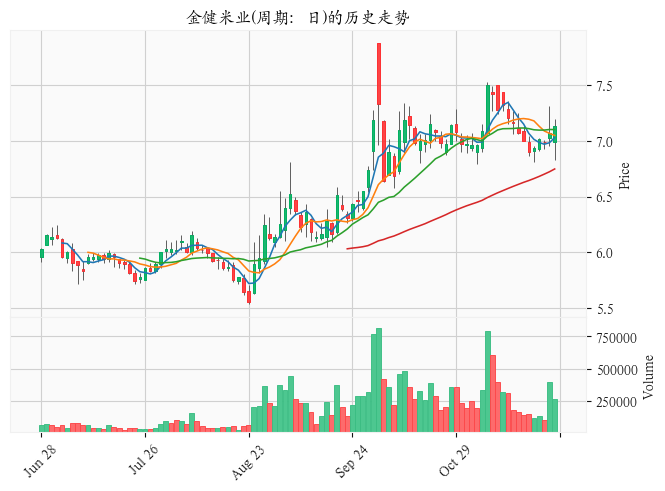

金健米业-周期：周
              日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0     1998-05-08  600127  16.61  16.78  17.47  16.00   449621  7.545420e+08   
1     1998-05-15  600127  16.90  15.80  16.90  14.71   147560  2.285610e+08   
2     1998-05-22  600127  15.97  15.35  15.98  14.79    57615  8.796200e+07   
3     1998-05-29  600127  15.30  15.10  15.30  14.75    57353  8.580000e+07   
4     1998-06-05  600127  15.10  15.75  15.99  14.85    78150  1.213190e+08   
...          ...     ...    ...    ...    ...    ...      ...           ...   
1325  2024-11-01  600127   6.97   6.96   7.29   6.89  1401498  9.871292e+08   
1326  2024-11-08  600127   6.90   7.28   7.53   6.79  2333076  1.689682e+09   
1327  2024-11-15  600127   7.44   7.00   7.44   7.00  1131587  8.166796e+08   
1328  2024-11-22  600127   6.99   7.07   7.31   6.81   908408  6.387894e+08   
1329  2024-11-25  600127   6.99   7.13   7.20   6.83   265243  1.872926e+08   

         振幅     涨跌幅    涨跌额    换手率  
0    

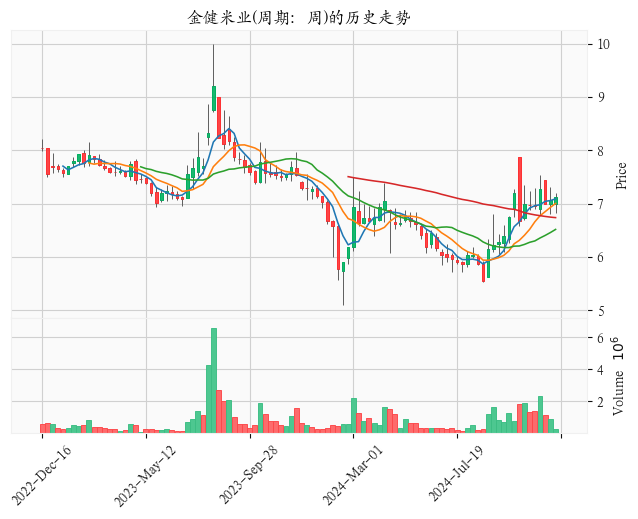

金健米业-周期：月
             日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0    1998-05-29  600127  16.61  15.10  17.47  14.71   712149  1.156865e+09   
1    1998-06-30  600127  15.10  15.23  16.28  14.85   240145  3.752130e+08   
2    1998-07-31  600127  15.50  13.85  15.60  13.69    82955  1.209500e+08   
3    1998-08-31  600127  13.80  12.32  13.90  10.03   125245  1.490980e+08   
4    1998-09-30  600127  12.50  12.70  13.66  12.10   137591  1.769740e+08   
..          ...     ...    ...    ...    ...    ...      ...           ...   
313  2024-07-31  600127   6.06   6.00   6.24   5.71  1205052  7.163113e+08   
314  2024-08-30  600127   6.01   6.14   6.34   5.53  2447643  1.475889e+09   
315  2024-09-30  600127   6.14   7.19   7.28   6.05  5257206  3.410523e+09   
316  2024-10-31  600127   7.88   6.97   7.88   6.58  6182459  4.368805e+09   
317  2024-11-25  600127   6.94   7.13   7.53   6.79  4889491  3.508291e+09   

        振幅     涨跌幅   涨跌额     换手率  
0    52.08  184.91

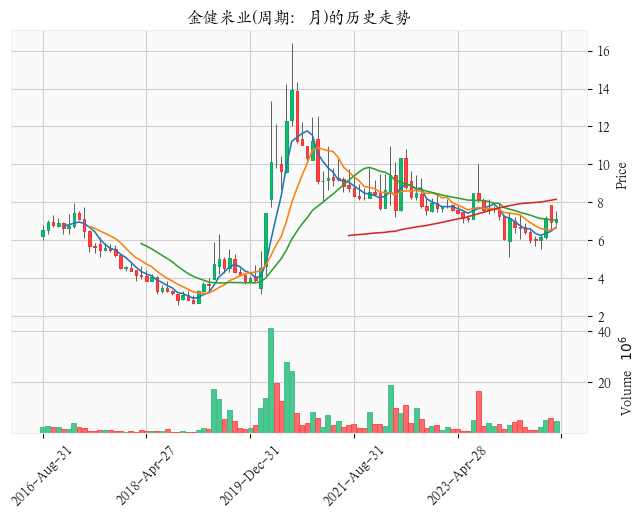

汇通能源-周期：日
              日期    股票代码     开盘     收盘     最高     最低    成交量          成交额  \
0     1992-04-29  600605   2.44   2.44   2.44   2.44      1        200.0   
1     1992-05-05  600605   2.56   2.56   2.56   2.56      1        300.0   
2     1992-05-08  600605   2.69   2.69   2.69   2.69      1        300.0   
3     1992-05-11  600605   2.82   2.82   2.82   2.82      1        300.0   
4     1992-05-13  600605  29.60  29.60  29.60  29.60      5       1000.0   
...          ...     ...    ...    ...    ...    ...    ...          ...   
7776  2024-11-19  600605  36.49  36.87  37.20  35.82  43057  157246898.0   
7777  2024-11-20  600605  37.45  40.56  40.56  37.08  90738  359717846.0   
7778  2024-11-21  600605  40.50  39.86  40.50  39.31  61706  245402506.0   
7779  2024-11-22  600605  40.39  39.89  40.50  39.28  43057  171476947.0   
7780  2024-11-25  600605  40.17  40.40  40.40  38.51  35497  140603686.0   

        振幅     涨跌幅    涨跌额   换手率  
0     0.00  -89.83 -21.56  0.01  
1     0.0

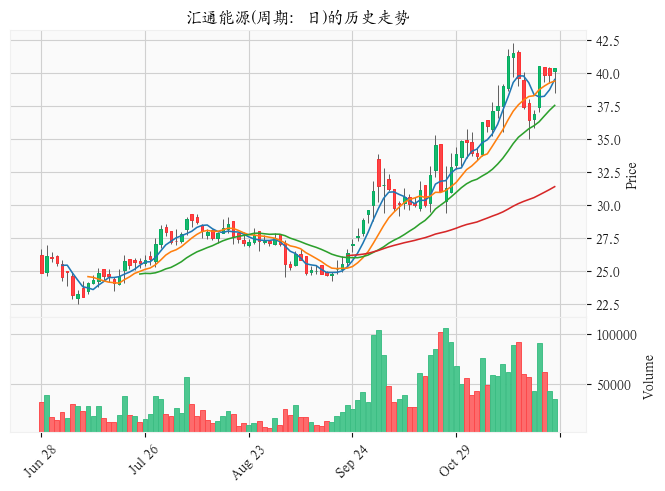

汇通能源-周期：周
              日期    股票代码      开盘      收盘      最高      最低     成交量  \
0     1992-04-29  600605    2.44    2.44    2.44    2.44       1   
1     1992-05-08  600605    2.56    2.69    2.69    2.56       2   
2     1992-05-15  600605    2.82    3.27   29.60    2.82       8   
3     1992-05-22  600605    3.43  220.00  250.00    3.43    5934   
4     1992-05-29  600605  230.50  190.00  237.50  150.50   10810   
...          ...     ...     ...     ...     ...     ...     ...   
1626  2024-11-01  600605   31.00   33.91   35.77   30.88  304349   
1627  2024-11-08  600605   33.91   37.50   39.07   33.42  286168   
1628  2024-11-15  600605   37.50   37.46   42.28   35.50  374108   
1629  2024-11-22  600605   37.70   39.89   40.56   35.00  295339   
1630  2024-11-25  600605   40.17   40.40   40.40   38.51   35497   

               成交额       振幅      涨跌幅     涨跌额     换手率  
0     2.000000e+02     0.00   -89.83  -21.56    0.01  
1     6.000000e+02     5.33    10.25    0.25    0.02  
2     1.

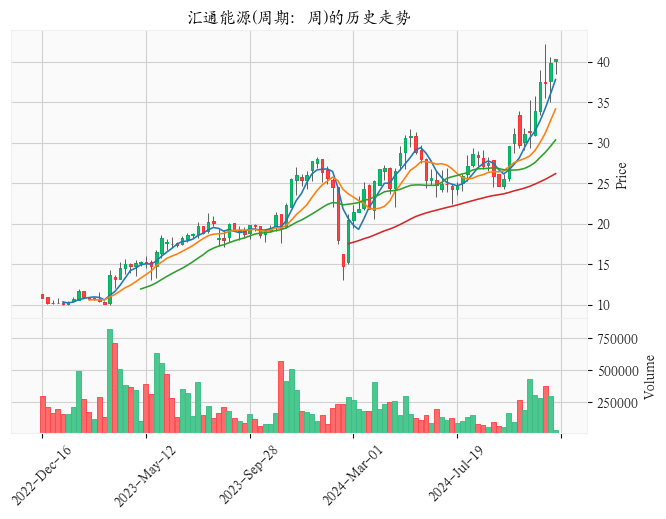

汇通能源-周期：月
             日期    股票代码      开盘      收盘      最高      最低      成交量  \
0    1992-04-29  600605    2.44    2.44    2.44    2.44        1   
1    1992-05-29  600605    2.56  190.00  250.00    2.56    16754   
2    1992-06-30  600605  173.00  170.05  181.00  146.00    37078   
3    1992-07-31  600605  171.50  153.78  180.50  134.50    30590   
4    1992-08-31  600605  153.00  113.50  164.75   85.00    46523   
..          ...     ...     ...     ...     ...     ...      ...   
384  2024-07-31  600605   24.96   28.15   28.50   22.47   521944   
385  2024-08-30  600605   28.30   27.53   29.34   26.55   404029   
386  2024-09-30  600605   27.83   31.07   31.85   24.25   476251   
387  2024-10-31  600605   33.50   34.79   35.77   29.17  1147588   
388  2024-11-25  600605   34.75   40.40   42.28   33.42  1029961   

              成交额        振幅      涨跌幅     涨跌额     换手率  
0    2.000000e+02      0.00   -89.83  -21.56    0.01  
1    3.411120e+07  10140.98  7686.89  187.56  167.54  
2    6.1

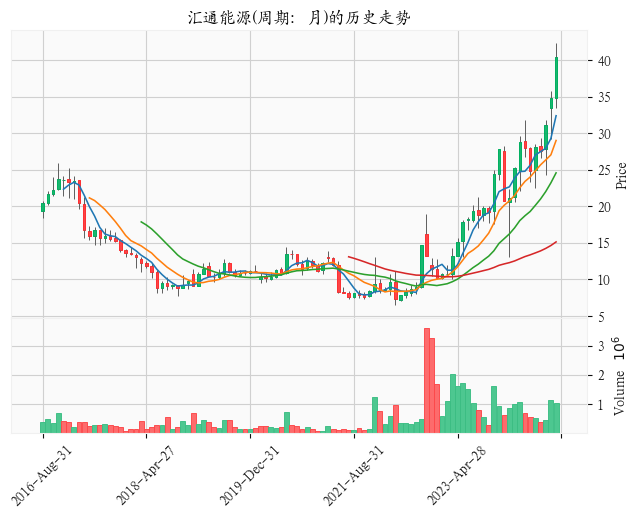

中再资环-周期：日
              日期    股票代码    开盘    收盘    最高    最低     成交量          成交额     振幅  \
0     1999-12-16  600217  9.00  7.98  9.08  7.95  293817  245362000.0  19.15   
1     1999-12-17  600217  7.88  7.89  8.00  7.82   48085   37863000.0   2.26   
2     1999-12-21  600217  7.80  7.53  7.80  7.51   29375   22314000.0   3.68   
3     1999-12-22  600217  7.50  7.64  7.70  7.46   15036   11404000.0   3.19   
4     1999-12-23  600217  7.60  7.30  7.60  7.28   18061   13337000.0   4.19   
...          ...     ...   ...   ...   ...   ...     ...          ...    ...   
5539  2024-11-19  600217  6.07  6.12  6.19  5.97  270505  164470061.0   3.65   
5540  2024-11-20  600217  6.12  6.16  6.21  6.01  260371  158888736.0   3.27   
5541  2024-11-21  600217  6.13  6.17  6.26  6.11  253556  156647048.0   2.44   
5542  2024-11-22  600217  6.14  5.92  6.20  5.89  254847  154587023.0   5.02   
5543  2024-11-25  600217  5.95  5.90  5.97  5.77  209069  122390951.0   3.38   

        涨跌幅   涨跌额    换手率  
0 

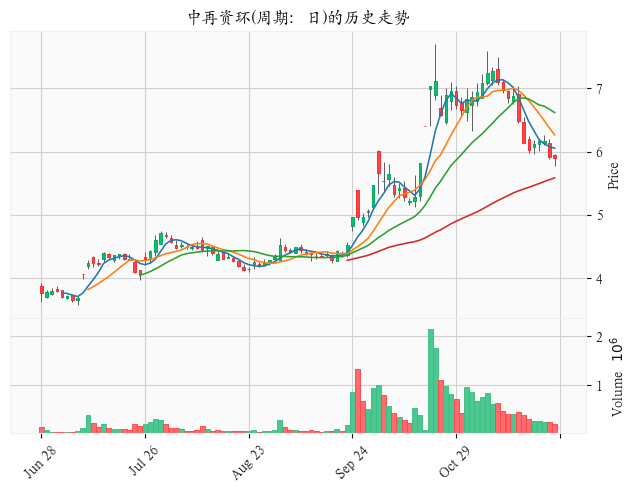

中再资环-周期：周
              日期    股票代码    开盘    收盘    最高    最低      成交量           成交额  \
0     1999-12-17  600217  9.00  7.89  9.08  7.82   341902  2.832250e+08   
1     1999-12-24  600217  7.80  7.22  7.80  7.20    72834  5.456500e+07   
2     1999-12-30  600217  7.22  7.31  7.48  7.10    36959  2.686600e+07   
3     2000-01-07  600217  7.31  8.09  8.10  7.19   140417  1.084970e+08   
4     2000-01-14  600217  8.20  7.44  8.38  7.38   152671  1.224150e+08   
...          ...     ...   ...   ...   ...   ...      ...           ...   
1170  2024-11-01  600217  6.80  6.86  7.10  6.32  3789486  2.565176e+09   
1171  2024-11-08  600217  6.80  7.10  7.59  6.72  3521120  2.511391e+09   
1172  2024-11-15  600217  7.10  6.14  7.13  6.13  2141752  1.447172e+09   
1173  2024-11-22  600217  6.20  5.92  6.26  5.89  1354656  8.258500e+08   
1174  2024-11-25  600217  5.95  5.90  5.97  5.77   209069  1.223910e+08   

         振幅    涨跌幅   涨跌额    换手率  
0     21.36  33.73  1.99  54.27  
1      7.60  -8.49 -0

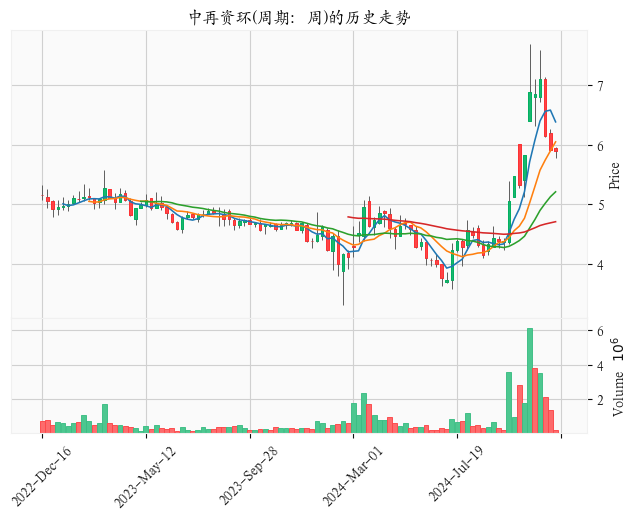

中再资环-周期：月
             日期    股票代码     开盘     收盘     最高    最低       成交量           成交额  \
0    1999-12-30  600217   9.00   7.31   9.08  7.10    451695  3.646560e+08   
1    2000-01-28  600217   7.31   7.98   8.38  7.19    436061  3.434970e+08   
2    2000-02-29  600217   8.20   8.40   8.99  7.50    430749  3.588490e+08   
3    2000-03-31  600217   8.44  10.55  11.62  8.26   1283522  1.272828e+09   
4    2000-04-28  600217  10.50  10.00  11.20  9.78    322443  3.374249e+08   
..          ...     ...    ...    ...    ...   ...       ...           ...   
282  2024-07-31  600217   3.70   4.71   4.74  3.57   3356735  1.430193e+09   
283  2024-08-30  600217   4.69   4.33   4.73  4.10   1911901  8.454961e+08   
284  2024-09-30  600217   4.29   5.47   5.48  4.24   5697247  2.820378e+09   
285  2024-10-31  600217   6.01   6.83   7.70  5.12  13574915  8.687053e+09   
286  2024-11-25  600217   6.74   5.90   7.59  5.77   8079723  5.472894e+09   

        振幅    涨跌幅   涨跌额     换手率  
0    33.56  23.90  

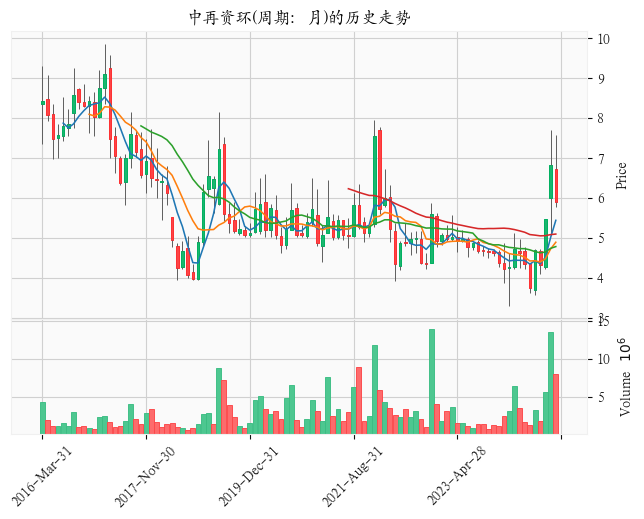

润禾材料-周期：日
              日期    股票代码     开盘     收盘     最高     最低    成交量          成交额  \
0     2017-11-27  300727  10.01  12.01  12.01  10.01     90     105221.0   
1     2017-11-28  300727  13.21  13.21  13.21  13.21     31      40369.0   
2     2017-11-29  300727  14.53  14.53  14.53  14.53     35      50651.0   
3     2017-11-30  300727  15.98  15.98  15.98  15.98     51      81258.0   
4     2017-12-01  300727  17.58  17.58  17.58  17.58     60     104987.0   
...          ...     ...    ...    ...    ...    ...    ...          ...   
1693  2024-11-19  300727  25.51  26.84  26.88  25.46  30992   80751344.0   
1694  2024-11-20  300727  26.93  28.13  28.55  26.54  46794  130026593.0   
1695  2024-11-21  300727  27.79  28.20  28.59  27.68  34020   95496756.0   
1696  2024-11-22  300727  28.16  26.38  28.33  26.34  32532   88714881.0   
1697  2024-11-25  300727  26.39  27.00  27.19  26.36  19008   50880833.0   

         振幅    涨跌幅   涨跌额   换手率  
0     23.98  44.00  3.67  0.04  
1      0.00

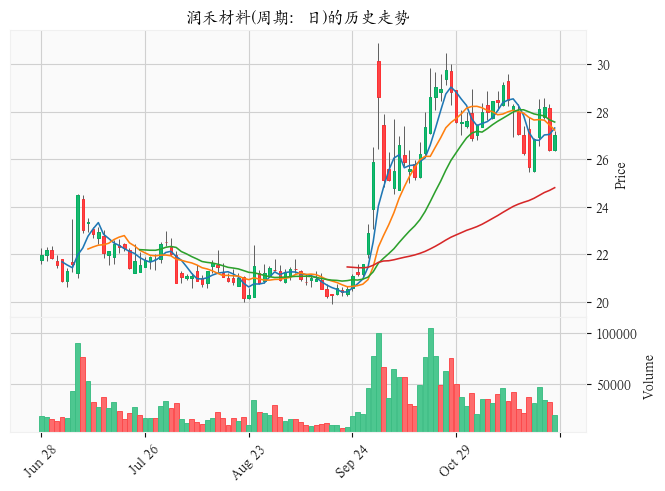

润禾材料-周期：周
             日期    股票代码     开盘     收盘     最高     最低     成交量           成交额  \
0    2017-12-01  300727  10.01  17.58  17.58  10.01     266  3.824860e+05   
1    2017-12-08  300727  19.34  28.31  28.31  19.34    9399  2.477722e+07   
2    2017-12-15  300727  31.14  29.09  33.65  28.55  669910  2.055255e+09   
3    2017-12-22  300727  27.28  27.83  27.83  24.06  383072  1.000881e+09   
4    2017-12-29  300727  27.52  32.99  36.65  27.00  629977  1.990257e+09   
..          ...     ...    ...    ...    ...    ...     ...           ...   
353  2024-11-01  300727  29.70  26.91  29.99  26.77  231138  6.490712e+08   
354  2024-11-08  300727  27.00  28.40  28.89  26.80  160781  4.511518e+08   
355  2024-11-15  300727  28.30  26.27  29.59  26.18  168943  4.742231e+08   
356  2024-11-22  300727  27.27  26.38  28.59  25.46  181232  4.924652e+08   
357  2024-11-25  300727  26.39  27.00  27.19  26.36   19008  5.088083e+07   

        振幅     涨跌幅    涨跌额     换手率  
0    90.77  110.79   9.24    

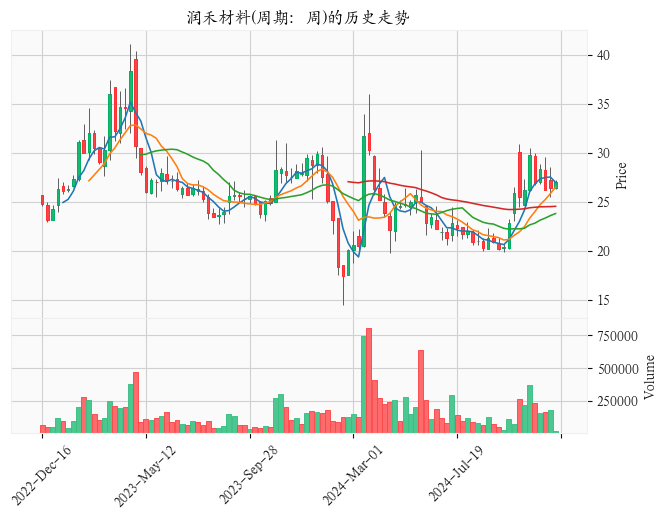

润禾材料-周期：月
            日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0   2017-11-30  300727  10.01  15.98  15.98  10.01      206  2.774990e+05   
1   2017-12-29  300727  17.58  32.99  36.65  17.58  1692418  5.071274e+09   
2   2018-01-31  300727  31.99  35.75  37.75  28.40  2244751  7.480053e+09   
3   2018-02-28  300727  36.10  30.01  39.60  26.11  1009485  3.241791e+09   
4   2018-03-30  300727  29.25  35.30  36.70  28.67  1463777  4.871277e+09   
..         ...     ...    ...    ...    ...    ...      ...           ...   
80  2024-07-31  300727  21.95  22.42  24.52  20.62   683869  1.534115e+09   
81  2024-08-30  300727  22.49  21.35  22.99  20.00   418451  8.935630e+08   
82  2024-09-30  300727  21.28  25.89  26.50  19.88   341098  7.522840e+08   
83  2024-10-31  300727  30.14  27.61  30.89  24.53  1051689  2.908418e+09   
84  2024-11-25  300727  27.96  27.00  29.59  25.46   570593  1.580847e+09   

        振幅     涨跌幅    涨跌额     换手率  
0    71.58   91.61   7.64    

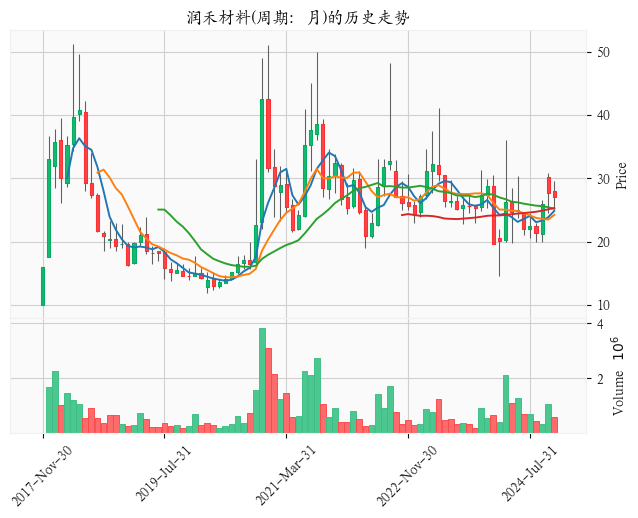

波长光电-周期：日
             日期    股票代码     开盘     收盘     最高     最低     成交量           成交额  \
0    2023-08-23  301421  60.00  52.29  70.43  52.22  201383  1.211987e+09   
1    2023-08-24  301421  50.00  63.80  67.98  50.00  188783  1.149693e+09   
2    2023-08-25  301421  61.94  53.92  63.66  53.88  147983  8.513772e+08   
3    2023-08-28  301421  70.00  59.30  78.01  59.02  194172  1.341567e+09   
4    2023-08-29  301421  55.01  67.45  75.00  54.60  184756  1.222935e+09   
..          ...     ...    ...    ...    ...    ...     ...           ...   
298  2024-11-19  301421  54.54  57.22  57.70  53.90   51743  2.869233e+08   
299  2024-11-20  301421  56.30  58.21  59.03  56.25   53213  3.071243e+08   
300  2024-11-21  301421  57.78  57.41  58.97  56.30   47276  2.734055e+08   
301  2024-11-22  301421  57.38  53.64  58.15  53.27   55987  3.126694e+08   
302  2024-11-25  301421  53.55  53.95  54.27  51.75   42221  2.234719e+08   

        振幅    涨跌幅    涨跌额    换手率  
0    61.98  77.98  22.91  73.40

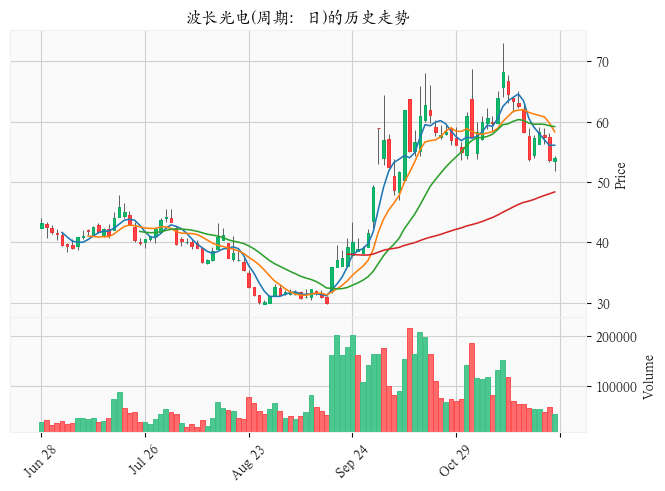

波长光电-周期：周
            日期    股票代码     开盘     收盘     最高     最低     成交量           成交额  \
0   2023-08-25  301421  60.00  53.92  70.43  50.00  538149  3.213057e+09   
1   2023-09-01  301421  70.00  74.00  84.98  54.60  859478  6.197469e+09   
2   2023-09-08  301421  75.60  80.74  96.32  68.52  705321  5.647982e+09   
3   2023-09-15  301421  77.82  76.88  88.49  72.55  521721  4.149007e+09   
4   2023-09-22  301421  75.55  64.38  80.20  63.06  345209  2.416874e+09   
..         ...     ...    ...    ...    ...    ...     ...           ...   
60  2024-11-01  301421  59.00  57.37  68.64  53.60  542823  3.215425e+09   
61  2024-11-08  301421  54.82  63.97  65.00  53.77  559546  3.350778e+09   
62  2024-11-15  301421  65.80  58.35  73.00  58.11  462278  3.011903e+09   
63  2024-11-22  301421  57.65  53.64  59.03  53.27  263341  1.486288e+09   
64  2024-11-25  301421  53.55  53.95  54.27  51.75   42221  2.234719e+08   

       振幅    涨跌幅    涨跌额     换手率  
0   69.54  83.53  24.54  196.14  
1   56.34

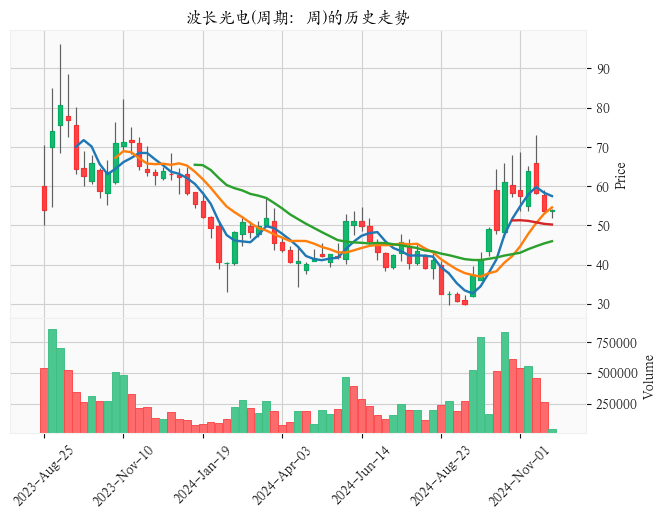

波长光电-周期：月
            日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0   2023-08-31  301421  60.00  82.20  84.98  50.00  1254487  8.309889e+09   
1   2023-09-28  301421  79.00  62.58  96.32  60.13  1978710  1.499251e+10   
2   2023-10-31  301421  61.30  71.81  76.20  55.18  1085112  6.760604e+09   
3   2023-11-30  301421  68.98  63.11  82.28  62.70  1515982  1.081516e+10   
4   2023-12-29  301421  62.85  62.43  68.50  58.11   595237  3.761466e+09   
5   2024-01-31  301421  63.10  43.00  64.78  43.00   428370  2.339992e+09   
6   2024-02-29  301421  42.59  48.56  51.20  32.90   601564  2.672118e+09   
7   2024-03-29  301421  48.96  45.57  56.98  43.68   916898  4.592849e+09   
8   2024-04-30  301421  45.75  41.71  47.07  34.22   645376  2.618872e+09   
9   2024-05-31  301421  42.74  51.10  52.77  39.30  1035530  4.666261e+09   
10  2024-06-28  301421  50.00  43.23  54.56  41.30  1064211  5.301245e+09   
11  2024-07-31  301421  43.00  43.75  47.78  38.40   824510  3.496

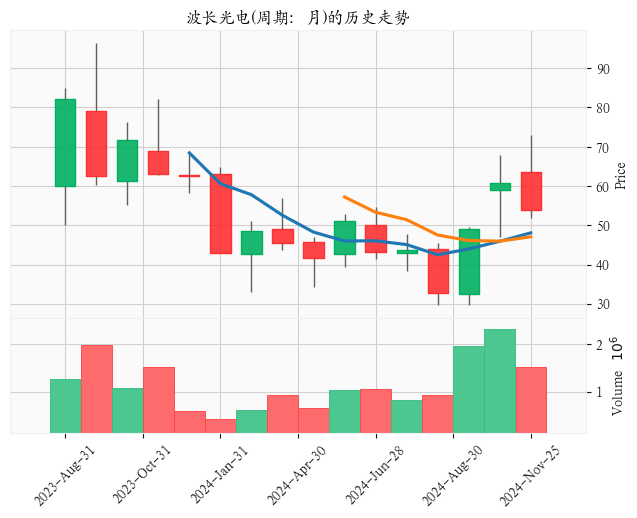

泰嘉股份-周期：日
              日期    股票代码     开盘     收盘     最高     最低     成交量           成交额  \
0     2017-01-20  002843   7.94   8.76   8.76   7.94     144  1.260670e+05   
1     2017-01-23  002843   9.64   9.64   9.64   9.64      70  6.773000e+04   
2     2017-01-24  002843  10.60  10.60  10.60  10.60      30  3.180000e+04   
3     2017-01-25  002843  11.66  11.66  11.66  11.66     111  1.291110e+05   
4     2017-01-26  002843  12.83  12.83  12.83  12.83     174  2.227670e+05   
...          ...     ...    ...    ...    ...    ...     ...           ...   
1899  2024-11-19  002843  17.14  17.70  17.78  16.81   99795  1.723581e+08   
1900  2024-11-20  002843  17.72  17.67  17.80  17.29   75321  1.320316e+08   
1901  2024-11-21  002843  17.67  19.44  19.44  17.32  155577  2.846187e+08   
1902  2024-11-22  002843  19.55  18.55  20.23  18.51  263437  5.106430e+08   
1903  2024-11-25  002843  18.51  18.20  18.51  17.17  164304  2.918217e+08   

         振幅    涨跌幅   涨跌额    换手率  
0     13.49  44.08 

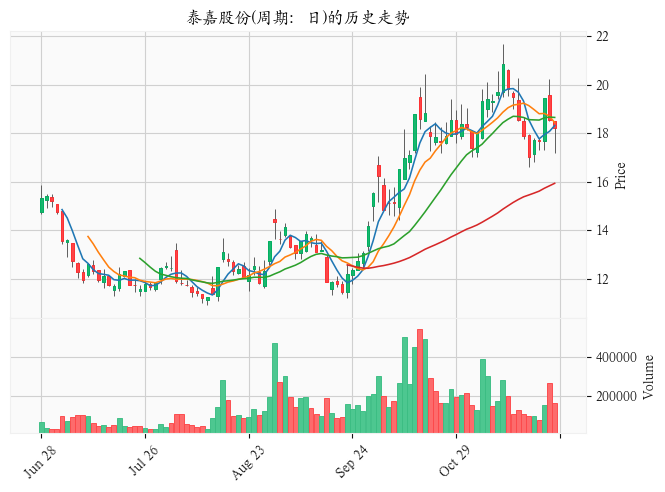

泰嘉股份-周期：周
             日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0    2017-01-20  002843   7.94   8.76   8.76   7.94      144  1.260670e+05   
1    2017-01-26  002843   9.64  12.83  12.83   9.64      385  4.514080e+05   
2    2017-02-03  002843  14.11  14.11  14.11  14.11      378  5.337810e+05   
3    2017-02-10  002843  15.52  22.73  22.73  15.52     2665  5.157104e+06   
4    2017-02-17  002843  25.00  34.08  36.61  25.00   243356  8.533008e+08   
..          ...     ...    ...    ...    ...    ...      ...           ...   
397  2024-11-01  002843  17.88  17.40  19.42  17.00   999053  1.828902e+09   
398  2024-11-08  002843  17.24  19.70  20.56  17.00  1138742  2.190050e+09   
399  2024-11-15  002843  19.70  17.88  21.67  17.75   823463  1.633364e+09   
400  2024-11-22  002843  17.91  18.55  20.23  16.60   694386  1.270278e+09   
401  2024-11-25  002843  18.51  18.20  18.51  17.17   164304  2.918217e+08   

        振幅    涨跌幅    涨跌额    换手率  
0    13.49  44.08  

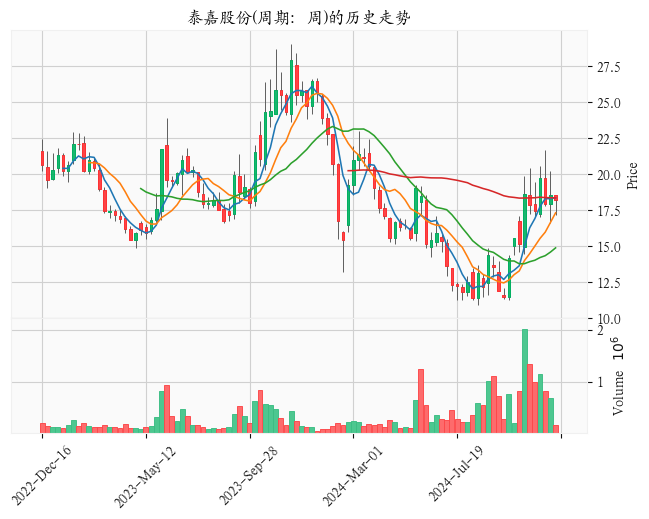

泰嘉股份-周期：月
            日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0   2017-01-26  002843   7.94  12.83  12.83   7.94      529  5.774750e+05   
1   2017-02-28  002843  14.11  43.51  43.51  14.11  1527454  5.584522e+09   
2   2017-03-31  002843  43.00  36.65  44.35  33.23  2057380  7.800412e+09   
3   2017-04-28  002843  36.60  47.11  48.67  36.00  1066769  4.444474e+09   
4   2017-05-31  002843  46.86  51.37  53.50  38.16   742624  3.556822e+09   
..         ...     ...    ...    ...    ...    ...      ...           ...   
90  2024-07-31  002843  15.23  12.45  15.50  11.27  1362765  1.705226e+09   
91  2024-08-30  002843  12.48  14.34  14.89  10.90  2658770  3.387091e+09   
92  2024-09-30  002843  13.65  15.52  15.58  11.21  3106376  4.103226e+09   
93  2024-10-31  002843  16.70  18.25  20.43  14.42  5018311  8.895622e+09   
94  2024-11-25  002843  18.08  18.20  21.67  16.60  2975849  5.655123e+09   

        振幅     涨跌幅    涨跌额     换手率  
0    80.43  111.02   6.75    

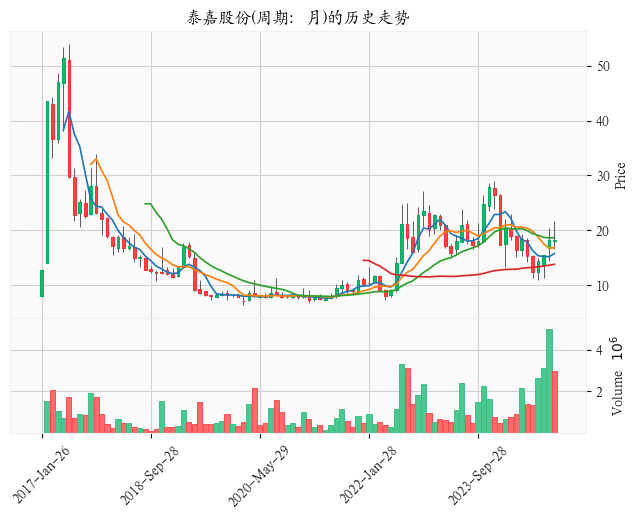

海油发展-周期：日
              日期    股票代码    开盘    收盘    最高    最低     成交量          成交额     振幅  \
0     2019-06-26  600968  2.45  2.94  2.94  2.45   34409   10093480.0  24.02   
1     2019-06-27  600968  3.23  3.23  3.23  3.23   44037   14224067.0   0.00   
2     2019-06-28  600968  3.55  3.55  3.55  3.55   36696   13027140.0   0.00   
3     2019-07-01  600968  3.91  3.91  3.91  3.91   32251   12610215.0   0.00   
4     2019-07-02  600968  4.30  4.30  4.30  4.30  634071  272650464.0   0.00   
...          ...     ...   ...   ...   ...   ...     ...          ...    ...   
1310  2024-11-19  600968  4.30  4.33  4.38  4.27  474959  204798248.0   2.57   
1311  2024-11-20  600968  4.34  4.30  4.38  4.28  504123  217934774.0   2.31   
1312  2024-11-21  600968  4.31  4.27  4.33  4.23  353262  150891159.0   2.33   
1313  2024-11-22  600968  4.28  4.09  4.31  4.09  533208  223178554.0   5.15   
1314  2024-11-25  600968  4.07  4.11  4.18  4.05  467662  192745507.0   3.18   

        涨跌幅   涨跌额   换手率  
0  

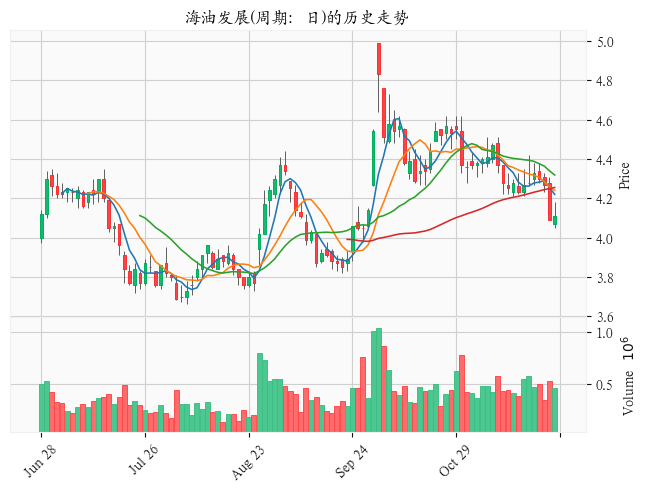

海油发展-周期：周
             日期    股票代码    开盘    收盘    最高    最低       成交量           成交额  \
0    2019-06-28  600968  2.45  3.55  3.55  2.45    115142  3.734469e+07   
1    2019-07-05  600968  3.91  4.21  4.70  3.91  24082887  1.059448e+10   
2    2019-07-12  600968  4.13  3.84  4.40  3.78  17423601  7.167052e+09   
3    2019-07-19  600968  3.82  3.78  3.96  3.62  11747660  4.456143e+09   
4    2019-07-26  600968  3.71  3.66  3.80  3.61   7786002  2.875390e+09   
..          ...     ...   ...   ...   ...   ...       ...           ...   
273  2024-11-01  600968  4.55  4.37  4.62  4.28   2689590  1.197985e+09   
274  2024-11-08  600968  4.37  4.37  4.51  4.31   2357940  1.036905e+09   
275  2024-11-15  600968  4.37  4.27  4.37  4.21   2232092  9.547594e+08   
276  2024-11-22  600968  4.28  4.09  4.42  4.09   2440034  1.046259e+09   
277  2024-11-25  600968  4.07  4.11  4.18  4.05    467662  1.927455e+08   

        振幅    涨跌幅   涨跌额     换手率  
0    53.92  74.02  1.51    0.62  
1    22.25  18.59  0.

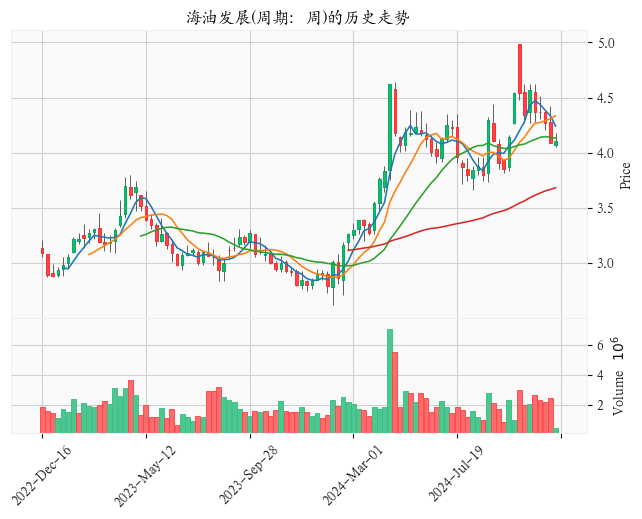

海油发展-周期：月
            日期    股票代码    开盘    收盘    最高    最低       成交量           成交额     振幅  \
0   2019-06-28  600968  2.45  3.55  3.55  2.45    115142  3.734469e+07  53.92   
1   2019-07-31  600968  3.91  3.62  4.70  3.61  63583927  2.602374e+10  30.70   
2   2019-08-30  600968  3.60  3.18  3.61  3.06  24065899  7.831537e+09  15.19   
3   2019-09-30  600968  3.17  3.08  3.60  3.08  22002815  7.370784e+09  16.35   
4   2019-10-31  600968  3.08  2.96  3.23  2.96   7726794  2.396904e+09   8.77   
..         ...     ...   ...   ...   ...   ...       ...           ...    ...   
61  2024-07-31  600968  4.12  3.86  4.35  3.72   7638243  3.106324e+09  15.29   
62  2024-08-30  600968  3.87  4.30  4.32  3.66   7086097  2.788633e+09  17.10   
63  2024-09-30  600968  4.27  4.54  4.55  3.82   8088371  3.321707e+09  16.98   
64  2024-10-31  600968  4.99  4.36  4.99  4.27   9346406  4.230526e+09  15.86   
65  2024-11-25  600968  4.39  4.11  4.51  4.05   7910931  3.412041e+09  10.55   

      涨跌幅   涨跌额  

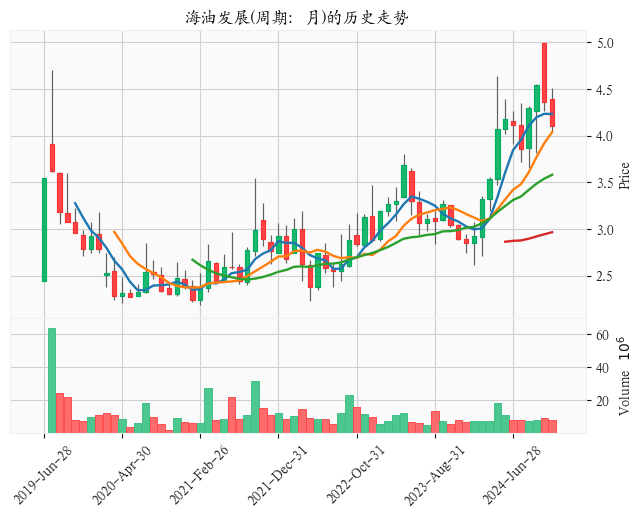

新研股份-周期：日
              日期    股票代码      开盘      收盘      最高      最低      成交量  \
0     2011-01-07  300159   96.00  106.62  110.90   95.11    75949   
1     2011-01-10  300159  104.00  107.12  108.12  103.00    27973   
2     2011-01-11  300159  108.00  102.79  112.12  100.02    23897   
3     2011-01-12  300159  101.00  101.66  104.68  100.10    13216   
4     2011-01-13  300159   98.00   98.21  102.89   97.00    13084   
...          ...     ...     ...     ...     ...     ...      ...   
3208  2024-11-19  300159    3.41    3.46    3.46    3.26   977859   
3209  2024-11-20  300159    3.45    3.73    3.79    3.41  1646152   
3210  2024-11-21  300159    3.65    3.83    3.93    3.62  1588579   
3211  2024-11-22  300159    3.84    3.59    3.93    3.58  1276494   
3212  2024-11-25  300159    3.48    3.55    3.57    3.45   798007   

              成交额     振幅    涨跌幅    涨跌额    换手率  
0     778534988.0  22.56  52.36  36.64  89.35  
1     296114054.0   4.80   0.47   0.50  32.91  
2     255696931.0

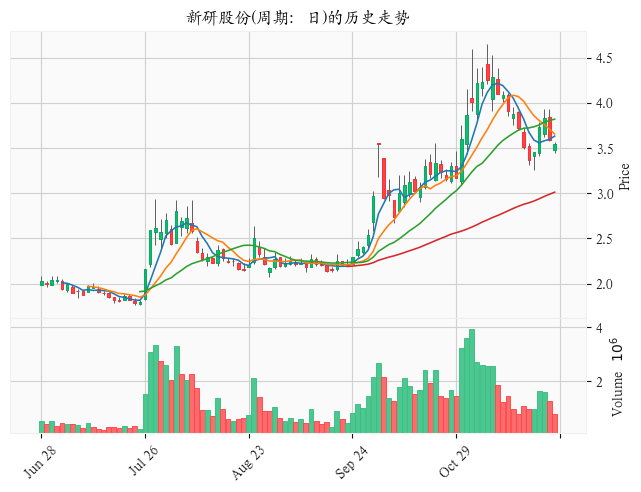

新研股份-周期：周
             日期    股票代码      开盘      收盘      最高     最低       成交量  \
0    2011-01-07  300159   96.00  106.62  110.90  95.11     75949   
1    2011-01-14  300159  104.00   95.49  112.12  92.10     92087   
2    2011-01-21  300159   93.99   90.90   94.50  84.98     32387   
3    2011-01-28  300159   89.71   90.70   91.50  83.51     15471   
4    2011-02-01  300159   90.50   87.96   92.88  87.70      4388   
..          ...     ...     ...     ...     ...    ...       ...   
675  2024-11-01  300159    3.14    4.01    4.60   3.09  13865165   
676  2024-11-08  300159    3.88    4.10    4.65   3.80  12260715   
677  2024-11-15  300159    4.05    3.51    4.13   3.49   5481109   
678  2024-11-22  300159    3.52    3.59    3.93   3.26   6444556   
679  2024-11-25  300159    3.48    3.55    3.57   3.45    798007   

              成交额     振幅    涨跌幅    涨跌额     换手率  
0    7.785350e+08  22.56  52.36  36.64   89.35  
1    9.494875e+08  18.78 -10.44 -11.13  108.34  
2    2.945338e+08   9.97  

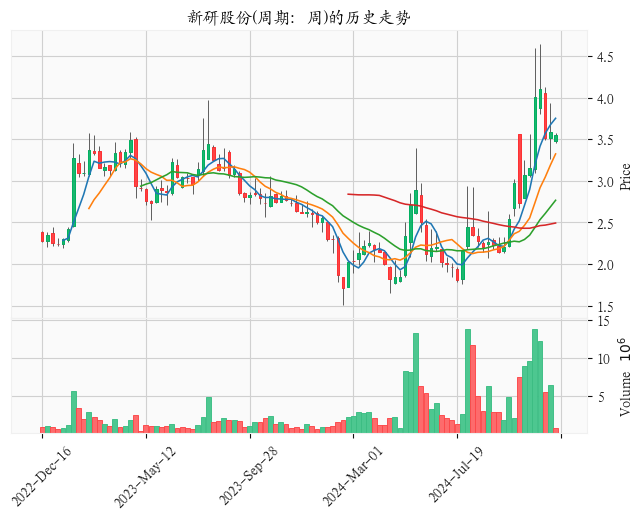

新研股份-周期：月
             日期    股票代码      开盘      收盘      最高     最低       成交量  \
0    2011-01-31  300159   96.00   91.60  112.12  83.51    217906   
1    2011-02-28  300159   91.02  108.00  118.80  87.05     70342   
2    2011-03-31  300159  107.90   88.34  109.50  87.50     78798   
3    2011-04-29  300159   88.98   35.42   90.88  33.02     62600   
4    2011-05-31  300159   34.88   33.20   35.97  31.85     71659   
..          ...     ...     ...     ...     ...    ...       ...   
156  2024-07-31  300159    2.01    2.57    2.94   1.76  17083227   
157  2024-08-30  300159    2.56    2.27    2.93   2.07  30576869   
158  2024-09-30  300159    2.29    2.97    3.02   2.13  14516551   
159  2024-10-31  300159    3.56    3.87    4.15   2.67  35887599   
160  2024-11-25  300159    4.05    3.55    4.65   3.26  28914083   

              成交额     振幅    涨跌幅    涨跌额     换手率  
0    2.177495e+09  40.88  30.89  21.62  256.36  
1    7.335405e+08  34.66  17.90  16.40   82.76  
2    7.700719e+08  20.37 -

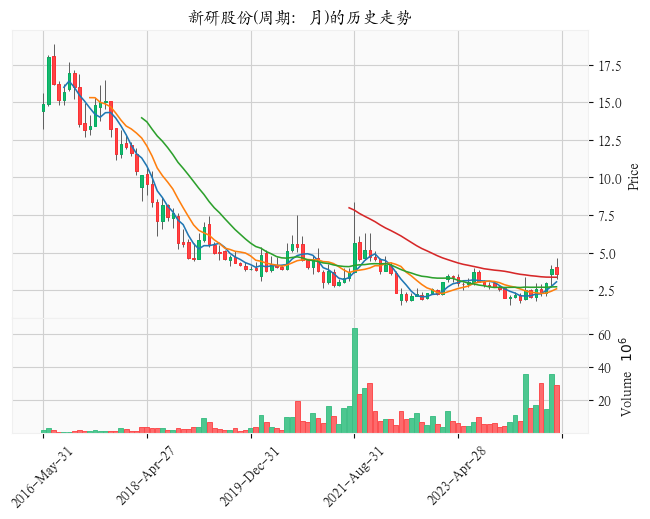

华泰证券-周期：日
              日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0     2010-02-26  601688  21.01  21.06  21.94  21.00  3109136  6.631745e+09   
1     2010-03-01  601688  20.60  21.15  21.36  20.53   955962  2.010405e+09   
2     2010-03-02  601688  21.21  20.80  21.27  20.73   595226  1.246285e+09   
3     2010-03-03  601688  20.74  21.43  21.67  20.62   834691  1.766018e+09   
4     2010-03-04  601688  21.29  20.82  21.43  20.72   513911  1.081647e+09   
...          ...     ...    ...    ...    ...    ...      ...           ...   
3567  2024-11-19  601688  18.40  18.48  18.56  18.06   874250  1.602997e+09   
3568  2024-11-20  601688  18.45  18.47  18.57  18.34   642906  1.186412e+09   
3569  2024-11-21  601688  18.47  18.47  18.65  18.36   679414  1.255423e+09   
3570  2024-11-22  601688  18.46  17.53  18.47  17.50  1091283  1.960116e+09   
3571  2024-11-25  601688  17.60  17.50  17.63  17.21   765684  1.337206e+09   

        振幅   涨跌幅   涨跌额    换手率  
0     4.7

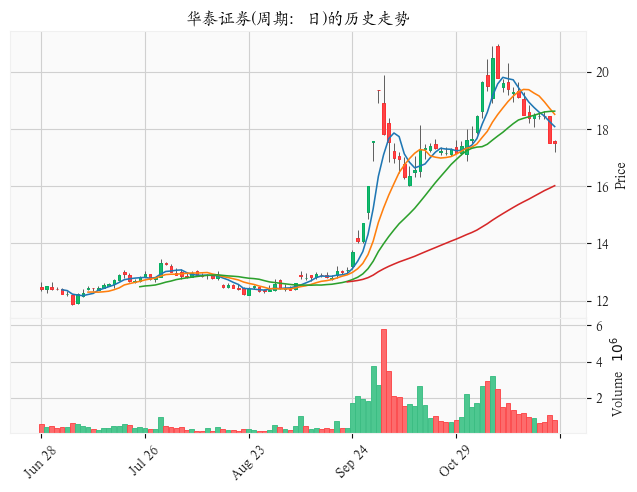

华泰证券-周期：周
             日期    股票代码     开盘     收盘     最高     最低       成交量           成交额  \
0    2010-02-26  601688  21.01  21.06  21.94  21.00   3109136  6.631745e+09   
1    2010-03-05  601688  20.60  22.25  22.90  20.53   4631557  9.939661e+09   
2    2010-03-12  601688  22.32  22.50  23.31  21.97   3314114  7.465588e+09   
3    2010-03-19  601688  22.35  22.31  22.68  22.00   1993000  4.448865e+09   
4    2010-03-26  601688  22.37  21.68  22.37  21.30   1421189  3.098904e+09   
..          ...     ...    ...    ...    ...    ...       ...           ...   
750  2024-11-01  601688  17.14  17.67  18.10  16.89   6175976  1.081507e+10   
751  2024-11-08  601688  17.91  19.80  20.98  17.83  13024542  2.549362e+10   
752  2024-11-15  601688  19.48  18.51  20.33  18.49   6839839  1.326074e+10   
753  2024-11-22  601688  18.61  17.53  18.84  17.50   4263611  7.813179e+09   
754  2024-11-25  601688  17.60  17.50  17.63  17.21    765684  1.337206e+09   

        振幅    涨跌幅   涨跌额    换手率  
0     4.

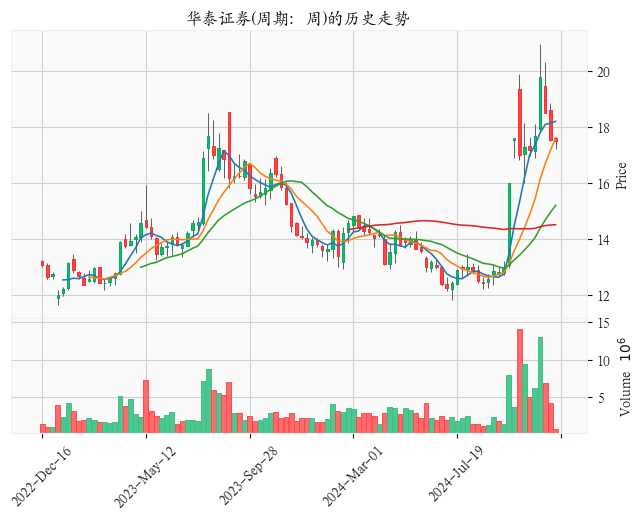

华泰证券-周期：月
             日期    股票代码     开盘     收盘     最高     最低       成交量           成交额  \
0    2010-02-26  601688  21.01  21.06  21.94  21.00   3109136  6.631745e+09   
1    2010-03-31  601688  20.60  21.62  23.31  20.53  12219542  2.683361e+10   
2    2010-04-30  601688  21.60  18.46  22.05  17.90   4371426  8.974356e+09   
3    2010-05-31  601688  18.10  14.38  18.33  14.21   5321913  8.384584e+09   
4    2010-06-30  601688  14.22  12.83  14.94  12.68   5369423  7.605351e+09   
..          ...     ...    ...    ...    ...    ...       ...           ...   
173  2024-07-31  601688  12.40  13.30  13.45  11.83   9922857  1.249219e+10   
174  2024-08-30  601688  13.30  12.58  13.35  12.20   6259501  7.978977e+09   
175  2024-09-30  601688  12.73  17.60  17.60  12.34  17281691  2.507237e+10   
176  2024-10-31  601688  19.36  17.63  19.90  16.00  33280423  5.857510e+10   
177  2024-11-25  601688  17.61  17.50  20.98  17.21  26418019  5.061366e+10   

        振幅    涨跌幅   涨跌额     换手率  
0     4

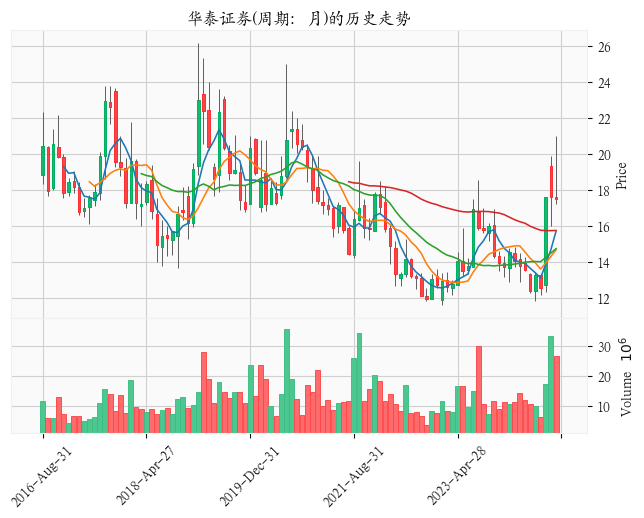

江苏银行-周期：日
              日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0     2016-08-02  600919   7.52   9.03   9.03   7.52   106695  9.546001e+07   
1     2016-08-03  600919   9.93   9.93   9.93   9.93    80270  7.970842e+07   
2     2016-08-04  600919  10.92  10.92  10.92  10.92    54761  5.979871e+07   
3     2016-08-05  600919  12.01  12.01  12.01  11.20  5469614  6.432869e+09   
4     2016-08-08  600919  11.80  11.46  11.80  11.28  4064548  4.670737e+09   
...          ...     ...    ...    ...    ...    ...      ...           ...   
2008  2024-11-19  600919   9.09   9.06   9.14   8.93   949823  8.597179e+08   
2009  2024-11-20  600919   9.06   9.02   9.10   8.98   667733  6.024783e+08   
2010  2024-11-21  600919   9.03   9.04   9.05   8.99   525529  4.740132e+08   
2011  2024-11-22  600919   9.02   8.86   9.08   8.85   870946  7.795328e+08   
2012  2024-11-25  600919   8.86   8.88   8.94   8.84   815478  7.242119e+08   

         振幅    涨跌幅   涨跌额    换手率  
0     2

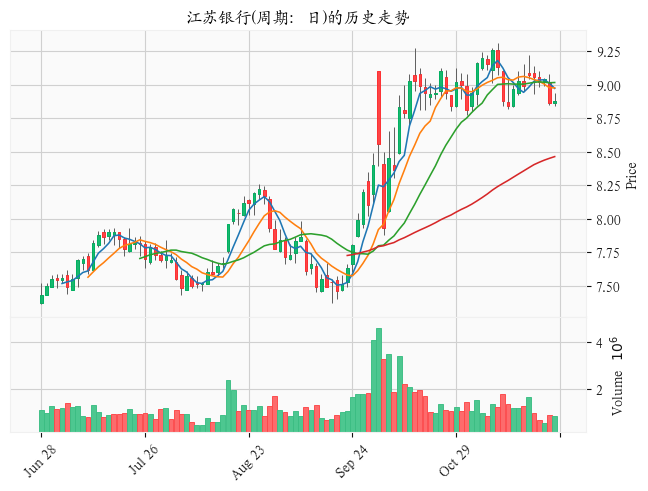

江苏银行-周期：周
             日期    股票代码     开盘     收盘     最高     最低       成交量           成交额  \
0    2016-08-05  600919   7.52  12.01  12.01   7.52   5711339  6.667836e+09   
1    2016-08-12  600919  11.80  13.53  13.60  11.28  20853982  2.554048e+10   
2    2016-08-19  600919  13.50  13.24  14.84  13.16  14805669  2.048427e+10   
3    2016-08-26  600919  13.16  12.12  13.22  12.10   7477975  9.529438e+09   
4    2016-09-02  600919  12.08  11.81  12.65  11.74   5559625  6.775239e+09   
..          ...     ...    ...    ...    ...    ...       ...           ...   
420  2024-11-01  600919   8.92   8.94   9.12   8.77   5798704  5.172498e+09   
421  2024-11-08  600919   8.93   9.13   9.31   8.85   5849679  5.344104e+09   
422  2024-11-15  600919   9.10   8.99   9.15   8.82   6722515  6.029405e+09   
423  2024-11-22  600919   9.09   8.86   9.22   8.85   4651297  4.211839e+09   
424  2024-11-25  600919   8.86   8.88   8.94   8.84    815478  7.242119e+08   

        振幅    涨跌幅   涨跌额     换手率  
0    71

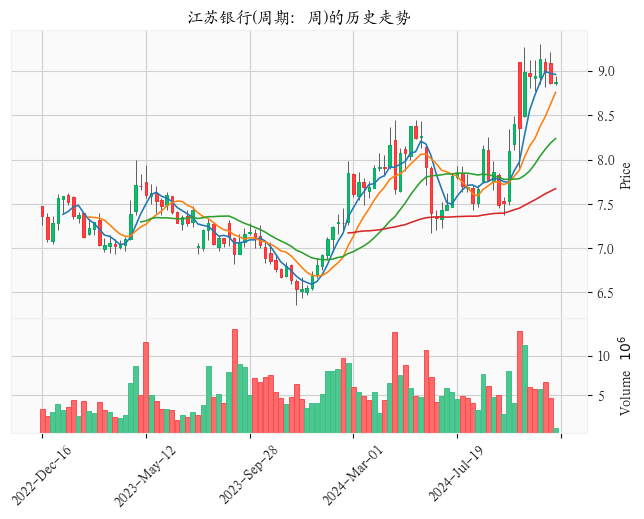

江苏银行-周期：月
            日期    股票代码     开盘     收盘     最高     最低       成交量           成交额  \
0   2016-08-31  600919   7.52  12.38  14.84   7.52  52246576  6.639744e+10   
1   2016-09-30  600919  12.30  10.00  12.33   9.96  12911922  1.443449e+10   
2   2016-10-31  600919  10.03  10.39  10.74   9.98  10062132  1.030715e+10   
3   2016-11-30  600919  10.33  10.78  11.55  10.09  18577659  1.982992e+10   
4   2016-12-30  600919  10.77   9.63  11.16   9.50   9720807  1.011136e+10   
..         ...     ...    ...    ...    ...    ...       ...           ...   
95  2024-07-31  600919   7.43   7.69   7.93   7.43  23613122  1.817860e+10   
96  2024-08-30  600919   7.69   7.77   8.26   7.43  22944667  1.803474e+10   
97  2024-09-30  600919   7.76   8.40   8.49   7.37  24441365  1.919319e+10   
98  2024-10-31  600919   9.10   8.81   9.27   7.88  35371811  3.094893e+10   
99  2024-11-25  600919   8.84   8.88   9.31   8.80  19081808  1.723889e+10   

        振幅    涨跌幅   涨跌额     换手率  
0   116.75  97.45  

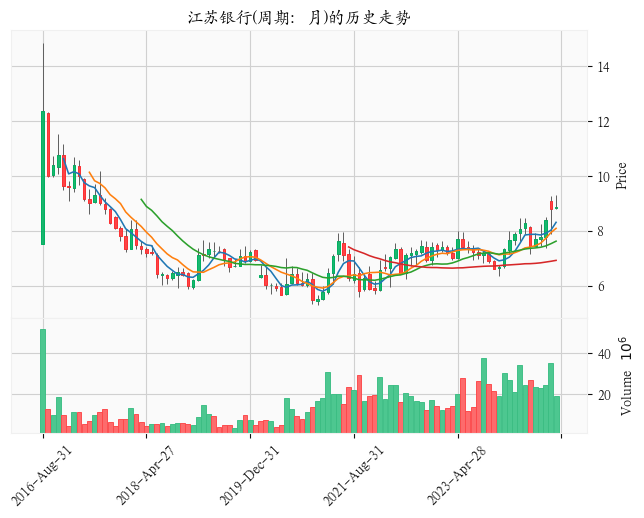

In [17]:
stockCharts={}
periods=['daily','weekly','monthly']

for f in focusStocks:
    print('='*75)
    stockCharts[f]=plotDcStocks(f,periods)
    stockname=stockCharts[f]['name']